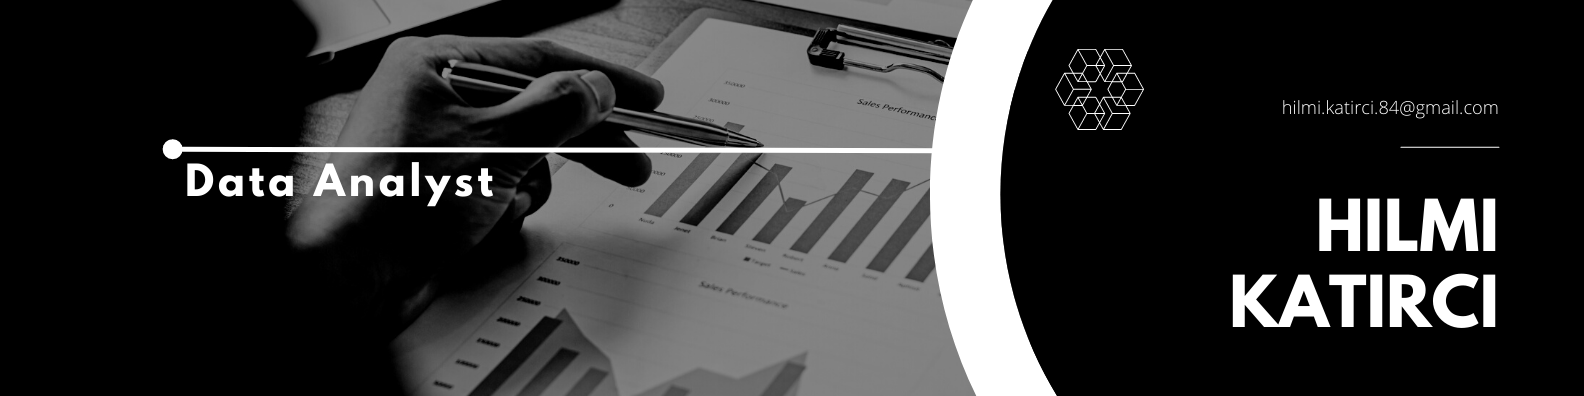

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Content</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [PART-02 (HANDLING WITH MISSING VALUES)](#1)
* [THE EXAMINATION OF MISSING VALUES IN THE COLUMNS](#2)    
* [THE END OF MISSING VALUES (PART - 02)](#3)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Importing Libraries Needed in This Notebook</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Once you've installed NumPy & Pandas you can import them as a library:

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10, 6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 150

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">PART- 02 (Handling with Missing Values)</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [ ]:
df = pd.read_csv("clean_scout.csv")

In [ ]:
df.shape

(15919, 32)

In [ ]:
df.head(3).T

0  \
make_model                                                     Audi A1   
body_type                                                       Sedans   
price                                                            15770   
vat                                                     VAT deductible   
km                                                           56013.000   
Type                                                              Used   
Warranty                                                           NaN   
Cylinders                                                        3.000   
Fuel                                                            Diesel   
Comfort_Convenience  Air conditioning, Armrest, Automatic climate c...   
Entertainment_Media  Bluetooth, Hands-free equipment, On-board comp...   
Extras                Alloy wheels, Catalytic Converter, Voice Control   
Safety_Security      ABS, Central door lock, Daytime running lights...   
Gears                                                              NaN   
age                                                              3.000   
Previous_Owners                                                  2.000   
hp_kW                                                           66.000   
Inspection_new                                                     Yes   
Paint_Type                                                    Metallic   
Upholstery_type                                                  Cloth   
Upholstery_color                                                 Black   
Nr_of_Doors                                                      5.000   
Nr_of_Seats                                                      5.000   
Gearing_Type                                                 Automatic   
Displacement_cc                                               1422.000   
Weight_kg                                                     1220.000   
Drive_chain                                                      front   
cons_comb                                                        3.800   
cons_city                                                        4.300   
cons_country                                                     3.500   
CO2_Emission                                                    99.000   
Emission_Class                                                  Euro 6   

                                                                     1  \
make_model                                                     Audi A1   
body_type                                                       Sedans   
price                                                            14500   
vat                                                   Price negotiable   
km                                                           80000.000   
Type                                                              Used   
Warranty                                                           NaN   
Cylinders                                                        4.000   
Fuel                                                           Benzine   
Comfort_Convenience  Air conditioning, Automatic climate control, H...   
Entertainment_Media  Bluetooth, Hands-free equipment, On-board comp...   
Extras               Alloy wheels, Sport seats, Sport suspension, V...   
Safety_Security      ABS, Central door lock, Central door lock with...   
Gears                                                            7.000   
age                                                              2.000   
Previous_Owners                                                    NaN   
hp_kW                                                          141.000   
Inspection_new                                                     NaN   
Paint_Type                                                         NaN   
Upholstery_type                                                  Cloth   
Upholstery_color                                                  Grey  

In [ ]:
df.isnull().sum()*100 / df.shape[0]

make_model             0.000
body_type              0.377
price                  0.000
vat                   28.350
km                     6.433
Type                   0.013
Warranty              69.514
Cylinders             35.681
Fuel                   0.000
Comfort_Convenience    5.779
Entertainment_Media    8.631
Extras                18.607
Safety_Security        6.169
Gears                 29.600
age                   10.032
Previous_Owners       41.711
hp_kW                  0.553
Inspection_new        75.300
Paint_Type            36.259
Upholstery_type       30.599
Upholstery_color      31.899
Nr_of_Doors            1.332
Nr_of_Seats            6.137
Gearing_Type           0.000
Displacement_cc        3.116
Weight_kg             43.809
Drive_chain           43.081
cons_comb             12.771
cons_city             15.302
cons_country          14.926
CO2_Emission          15.302
Emission_Class        22.790
dtype: float64

In [ ]:
miss_val = []

[miss_val.append(column) for column in df.columns if any(df[column].isnull())]

print("Columns that have missing values :")

miss_val

Columns that have missing values :


['body_type',
 'vat',
 'km',
 'Type',
 'Warranty',
 'Cylinders',
 'Comfort_Convenience',
 'Entertainment_Media',
 'Extras',
 'Safety_Security',
 'Gears',
 'age',
 'Previous_Owners',
 'hp_kW',
 'Inspection_new',
 'Paint_Type',
 'Upholstery_type',
 'Upholstery_color',
 'Nr_of_Doors',
 'Nr_of_Seats',
 'Displacement_cc',
 'Weight_kg',
 'Drive_chain',
 'cons_comb',
 'cons_city',
 'cons_country',
 'CO2_Emission',
 'Emission_Class']

In [ ]:
# function for first looking to the columns

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()*100 / df.shape[0], 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print("--------------------------------")
    print(df[col].value_counts(dropna = False))

## functions to fill the missing values

In [ ]:
def fill_most_freq(df, group_col, col_name):
    
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
def fill_prop(df, group_col, col_name):
    
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
def fill(df, group_col1, group_col2, col_name, method): # method can be either "mode" or "mean" or "median" or "ffill"
    
    '''Fills the missing values with "mode/mean/median/ffill/bfill method" according to double-stage grouping'''
    
    if method == "mode":
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond1 = df[group_col1]==group1
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                mode1 = list(df[cond1][col_name].mode())
                mode2 = list(df[cond2][col_name].mode())
                if mode2 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
                elif mode1 != []:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
                else:
                    df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])

    elif method == "mean":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("mean"), inplace = True)
        df[col_name].fillna(df[col_name].mean(), inplace = True)
        
    elif method == "median":
        df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
        df[col_name].fillna(df[col_name].median(), inplace = True)
        
    elif method == "ffill":           
        for group1 in list(df[group_col1].unique()):
            for group2 in list(df[group_col2].unique()):
                cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
        for group1 in list(df[group_col1].unique()):
            cond1 = df[group_col1]==group1
            df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
        df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">The Examination of Missing Values in the Columns</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## Let's examine and fill the missing values of all the columns/features one by one

## age

In [ ]:
first_looking("age")

column name    :  age
--------------------------------
per_of_nulls   :  % 10.03
num_of_nulls   :  1597
num_of_uniques :  4
--------------------------------
1.000    4522
3.000    3674
2.000    3273
0.000    2853
NaN      1597
Name: age, dtype: int64


In [ ]:
df['age'].fillna('-', inplace=True)

**``describe()``** does **NOT** return anything for "NaN" values. If you have **``"Nan"``** at the column you are interested in, you should replace these "nan" values with something else. In our case, we have replaced the **``"NaN"``** values with **``"-"``** so that we could implement the "describe" method.

In [ ]:
df["age"].value_counts(dropna=False)

1.0    4522
3.0    3674
2.0    3273
0.0    2853
-      1597
Name: age, dtype: int64

In [ ]:
df.groupby("age").km.describe()

count      mean       std    min       25%       50%       75%  \
age                                                                     
0.0 2706.000  2085.355  5365.881  1.000    10.000    50.000  3000.000   
1.0 4484.000 18035.239 11052.524  1.000  9990.000 17872.000 25078.500   
2.0 3272.000 41754.941 28295.748  1.000 21541.750 34752.000 54805.500   
3.0 3674.000 77442.521 39170.143 10.000 48000.000 72914.500 99950.000   
-    759.000   934.497  7416.244  0.000     5.000    10.000    10.000   

           max  
age             
0.0 127022.000  
1.0 136000.000  
2.0 317000.000  
3.0 291800.000  
-    89982.000

In [ ]:
df[df["age"] == "-"]["km"].value_counts(dropna=False)

NaN          838
10.000       369
1.000        146
5.000         58
20.000        32
15.000        21
0.000         19
11.000        12
8.000         11
50.000        10
12.000         8
100.000        8
7.000          7
3.000          4
9.000          4
4.000          3
250.000        3
25.000         3
30.000         3
3000.000       2
39962.000      2
2.000          2
22627.000      2
784.000        1
89692.000      1
3500.000       1
325.000        1
497.000        1
99.000         1
77.000         1
40.000         1
19500.000      1
6100.000       1
11000.000      1
89982.000      1
4307.000       1
141.000        1
34164.000      1
500.000        1
150.000        1
11200.000      1
20768.000      1
32084.000      1
142.000        1
81800.000      1
281.000        1
6.000          1
68485.000      1
85000.000      1
196.000        1
4500.000       1
60.000         1
5000.000       1
Name: km, dtype: int64

In [ ]:
cond1 = (df['km'] < 10000)
cond2 = ((df['km'] >= 10000) & (df['km'] < 28000))
cond3 = ((df['km'] >= 28000) & (df['km'] < 50000))
cond4 = (df['km'] >= 50000)

**Let us use replace() function to fill missing values at "age" column with proper values.**

In [ ]:
df.loc[cond1,'age'] = df.loc[cond1,'age'].replace('-', 0)
df.loc[cond2,'age'] = df.loc[cond2,'age'].replace('-', 1)
df.loc[cond3,'age'] = df.loc[cond3,'age'].replace('-', 2)
df.loc[cond4,'age'] = df.loc[cond4,'age'].replace('-', 3)

In [ ]:
df.groupby('age').km.mean()

age
0.0    1647.363
1.0   18035.130
2.0   41748.577
3.0   77450.063
-           NaN
Name: km, dtype: float64

**After filling the "missing values", we see that the mean of "km" for each "age" group is very close to the old averages.**

In [ ]:
df["age"].value_counts(dropna=False)

1.0    4528
3.0    3679
0.0    3597
2.0    3277
-       838
Name: age, dtype: int64

**However, there have still been some missing values represented by "-"** 

In [ ]:
df.groupby(['make_model',"body_type", 'age']).price.describe()

count      mean       std       min  \
make_model     body_type     age                                         
Audi A1        Compact       0.0 198.000 23277.434  3510.406 14900.000   
                             1.0 268.000 18596.041  2659.910 13980.000   
                             2.0 161.000 16602.807  2085.384 10999.000   
                             3.0 234.000 14532.910  1908.909  9950.000   
                             -   178.000 23996.264  3383.852 16220.000   
               Coupe         2.0   1.000 15900.000       NaN 15900.000   
                             3.0   1.000 13950.000       NaN 13950.000   
               Other         0.0   8.000 23826.250  2057.439 21490.000   
                             1.0   3.000 16796.667   178.979 16590.000   
                             2.0   1.000 23490.000       NaN 23490.000   
                             -     1.000 21850.000       NaN 21850.000   
               Sedans        0.0 368.000 24158.087  3196.985 15990.000   
                             1.0 465.000 18394.938  2588.159 13450.000   
                             2.0 266.000 16605.395  2223.979 11600.000   
                             3.0 389.000 14466.900  1890.278  8999.000   
                             -    50.000 23336.560  3815.326 15980.000   
               Station wagon 0.0   2.000 28944.500    77.075 28890.000   
                             1.0  11.000 17410.909  2166.031 15750.000   
                             2.0   3.000 17613.333  2953.817 14750.000   
                             3.0   5.000 14358.000  1276.891 12950.000   
               Van           0.0   1.000 29000.000       NaN 29000.000   
Audi A2        Off-Road      1.0   1.000 28200.000       NaN 28200.000   
Audi A3        Compact       0.0  17.000 29345.471  8767.065 15500.000   
                             1.0  29.000 22030.931  4270.469 14500.000   
                             2.0  39.000 20489.769  8208.445 13790.000   
                             3.0  93.000 15303.796  2256.723 12900.000   
                             -     4.000 25582.500  1185.109 24542.000   
               Convertible   1.0   3.000 29664.333 23557.901 10893.000   
                             2.0   4.000 28562.500  5301.159 20900.000   
                             3.0   1.000 20000.000       NaN 20000.000   
               Coupe         2.0   1.000 19000.000       NaN 19000.000   
                             3.0   3.000 17326.667   583.124 16990.000   
               Other         1.0   4.000 23422.500  3548.055 20200.000   
                             2.0   4.000 18675.000  1351.851 17650.000   
                             3.0   5.000 15970.000  2392.070 12550.000   
                             -     3.000 25990.000  1322.876 24490.000   
               Sedans        0.0 626.000 24909.898  2354.990 18820.000   
                             1.0 709.000 22544.715  5224.410 14250.000   
                             2.0 550.000 19980.358  3721.376 10550.000   
                             3.0 647.000 16702.832  2900.228 10950.000   
                             -    66.000 24395.242  2372.569 19750.000   
               Station wagon 0.0  69.000 25219.000  5011.257 17990.000   
                             1.0  32.000 21252.594  3201.415  5555.000   
                             2.0  72.000 19010.875  1522.622 14590.000   
                             3.0  67.000 15739.507  1883.567 11790.000   
                             -    42.000 23558.667  1687.726 18980.000   
Opel Astra     Compact       0.0  51.000 23056.118  7391.480 16500.000   
                             1.0  39.000 14717.538  1266.385 11999.000   
                             2.0  55.000 13091.491  1884.243  9999.000   
                             3.0  30.000 12023.733  2767.419  8450.000   
                             -    10.000 16636.600  1098.445 15816.000   
               Coupe         0.0   1.000 29990.000       NaN 29990.000   
                             3.0   1.00

In [ ]:
df['age'].replace('-', 0, inplace=True)

In [ ]:
df.groupby('age').km.mean()

age
0.000    1647.363
1.000   18035.130
2.000   41748.577
3.000   77450.063
Name: km, dtype: float64

In [ ]:
df["age"].value_counts(dropna=False)

1.000    4528
0.000    4435
3.000    3679
2.000    3277
Name: age, dtype: int64

## km

In [ ]:
first_looking("km")

column name    :  km
--------------------------------
per_of_nulls   :  % 6.43
num_of_nulls   :  1024
num_of_uniques :  6689
--------------------------------
10.000       1045
NaN          1024
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6690, dtype: int64


In [ ]:
df.groupby("age").km.mean()

age
0.000    1647.363
1.000   18035.130
2.000   41748.577
3.000   77450.063
Name: km, dtype: float64

In [ ]:
df[df["km"].isna()][["age", "km"]]

age  km
743   0.000 NaN
869   0.000 NaN
946   0.000 NaN
977   0.000 NaN
980   0.000 NaN
...     ...  ..
15890 0.000 NaN
15902 0.000 NaN
15912 0.000 NaN
15914 0.000 NaN
15918 0.000 NaN

[1024 rows x 2 columns]

**Let us use transform() function to fill missing values at "km" column with "mean".**

In [ ]:
df.groupby("age").km.transform("mean")

0       77450.063
1       41748.577
2       77450.063
3       77450.063
4       77450.063
           ...   
15914    1647.363
15915    1647.363
15916    1647.363
15917    1647.363
15918    1647.363
Name: km, Length: 15919, dtype: float64

In [ ]:
df["km"].fillna(df.groupby("age").km.transform("mean"), inplace=True)

In [ ]:
df[df["km"].isna()][["age", "km"]]

Empty DataFrame
Columns: [age, km]
Index: []

**Using transform() function, we have filled missing values at "km" column with the "mean" of the each "age" group.**

In [ ]:
df.km.value_counts(dropna=False)

10.000       1045
1647.363      985
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6692, dtype: int64

## body type

In [ ]:
first_looking("body_type")

column name    :  body_type
--------------------------------
per_of_nulls   :  % 0.38
num_of_nulls   :  60
num_of_uniques :  9
--------------------------------
Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


In [ ]:
df.body_type.replace("Other", np.nan, inplace=True) 

**We do NOT have any information about "other". So we have assigned them to "NaN" to use "fillna" function.**

In [ ]:
df['body_type'].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
NaN               350
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [ ]:
df["body_type"].mode()

0    Sedans
Name: body_type, dtype: object

In [ ]:
df["body_type"].mode()[0]

'Sedans'

In [ ]:
# Step-1

# df["body_type"].fillna(df["body_type"].mode()[0])

# Step-2

# df.loc[df["make_model"]=="Audi A1", "body_type"].fillna(df[df["make_model"]=="Audi A1"]["body_type"].mode()[0])
# df.loc[df["make_model"]=="Opel Astra", "body_type"].fillna(df[df["make_model"]=="Opel Astra"]["body_type"].mode()[0])
# ...

In [ ]:
# Step-3

for group in df["make_model"].unique():
    cond = df["make_model"]==group
    mode = df[cond]["body_type"].mode().to_list()  # list(df[cond]["body_type"].mode())
    if mode != []:
        df.loc[cond, "body_type"] = df.loc[cond, "body_type"].fillna(df[cond]["body_type"].mode()[0])
    else:
        df.loc[cond, "body_type"] = df.loc[cond, "body_type"].fillna(df["body_type"].mode()[0])

In [ ]:
df['body_type'].value_counts(dropna=False)

Sedans           8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [ ]:
def fill_most_freq(df, group_col, col_name):
    '''Fills the missing values with the most existing value (mode) in the relevant column according to single-stage grouping'''
    
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        mode = list(df[cond][col_name].mode())
        if mode != []:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[cond][col_name].mode()[0])
        else:
            df.loc[cond, col_name] = df.loc[cond, col_name].fillna(df[col_name].mode()[0])
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
fill_most_freq(df, "make_model", "body_type")

Number of NaN :  0
------------------
Sedans           8005
Station wagon    3678
Compact          3242
Van               817
Transporter        88
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64


## Previous_Owners

In [ ]:
first_looking("Previous_Owners")

column name    :  Previous_Owners
--------------------------------
per_of_nulls   :  % 41.71
num_of_nulls   :  6640
num_of_uniques :  5
--------------------------------
1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: Previous_Owners, dtype: int64


In [ ]:
df["Previous_Owners"].fillna("-", inplace = True)

In [ ]:
df["Previous_Owners"].value_counts(dropna=False)

1.0    8294
-      6640
2.0     778
0.0     188
3.0      17
4.0       2
Name: Previous_Owners, dtype: int64

In [ ]:
df.groupby(['make_model', 'body_type', 'age', 'Previous_Owners']).price.describe()

count      mean  \
make_model     body_type     age   Previous_Owners                     
Audi A1        Compact       0.000 0.0              16.000 22445.562   
                                   1.0              81.000 23396.506   
                                   2.0               1.000 21760.000   
                                   -               278.000 23756.335   
                             1.000 1.0             195.000 18108.738   
                                   2.0               7.000 19319.714   
                                   -                66.000 19959.045   
                             2.000 1.0              65.000 16785.785   
                                   2.0              43.000 16099.070   
                                   -                53.000 16787.094   
                             3.000 1.0             128.000 14317.625   
                                   2.0              50.000 15031.180   
                                   3.0               1.000 11990.000   
                                   -                55.000 14627.200   
               Coupe         2.000 -                 1.000 15900.000   
                             3.000 2.0               1.000 13950.000   
               Sedans        0.000 0.0              29.000 21705.379   
                                   1.0             157.000 24610.796   
                                   -               241.000 23967.274   
                             1.000 0.0               1.000 19700.000   
                                   1.0             290.000 18172.645   
                                   2.0               7.000 19268.143   
                                   -               170.000 18702.306   
                             2.000 0.0               1.000 15900.000   
                                   1.0             129.000 16784.705   
                                   2.0              29.000 16738.276   
                                   3.0               1.000 15480.000   
                                   4.0               1.000 21300.000   
                                   -               106.000 16388.755   
                             3.000 0.0               4.000 13522.500   
                                   1.0             268.000 14477.851   
                                   2.0              31.000 13936.161   
                                   -                86.000 14668.012   
               Station wagon 0.000 1.0               1.000 28890.000   
                                   -                 1.000 28999.000   
                             1.000 1.0              11.000 17410.909   
                             2.000 1.0               1.000 14750.000   
                                   2.0               2.000 19045.000   
                             3.000 1.0               5.000 14358.000   
               Van           0.000 -                 1.000 29000.000   
Audi A2        Off-Road      1.000 1.0               1.000 28200.000   
Audi A3        Compact       0.000 0.0               2.000 23582.500   
                                   1.0               2.000 22945.000   
                                   -                17.000 29891.059   
                             1.000 1.0               1.000 19990.000   
                                   -                28.000 22103.821   
                             2.000 1.0              10.000 22861.000   
                                   2.0               1.000 18900.000   
                                   -                28.000 19699.679   
                             3.000 1.0              12.000 17681.667   
                                   2.0               1.000 14900.000   
                                   -                80.000 14952.163   
               Convertible   1.000 1.0               2.000 39050.000   
                                   -                 1.000 10893.000   
                     

In [ ]:
df.groupby(['make_model', 'body_type', 'age', 'Previous_Owners']).km.describe()

count       mean  \
make_model     body_type     age   Previous_Owners                      
Audi A1        Compact       0.000 0.0              16.000   1031.477   
                                   1.0              81.000   4172.407   
                                   2.0               1.000   3000.000   
                                   -               278.000   1609.993   
                             1.000 1.0             195.000  13843.036   
                                   2.0               7.000   9757.143   
                                   -                66.000  17130.561   
                             2.000 1.0              65.000  25137.446   
                                   2.0              43.000  17495.372   
                                   -                53.000  26966.019   
                             3.000 1.0             128.000  53844.062   
                                   2.0              50.000  49819.940   
                                   3.0               1.000  45000.000   
                                   -                55.000  64144.000   
               Coupe         2.000 -                 1.000  50000.000   
                             3.000 2.0               1.000  27300.000   
               Sedans        0.000 0.0              29.000    918.028   
                                   1.0             157.000   2491.438   
                                   -               241.000   1474.141   
                             1.000 0.0               1.000  15000.000   
                                   1.0             290.000  13696.439   
                                   2.0               7.000  17711.429   
                                   -               170.000  12688.071   
                             2.000 0.0               1.000  68002.000   
                                   1.0             129.000  23200.372   
                                   2.0              29.000  26218.759   
                                   3.0               1.000  18890.000   
                                   4.0               1.000  19700.000   
                                   -               106.000  31781.179   
                             3.000 0.0               4.000  58176.750   
                                   1.0             268.000  54232.989   
                                   2.0              31.000  50887.290   
                                   -                86.000  53523.953   
               Station wagon 0.000 1.0               1.000   4500.000   
                                   -                 1.000   1700.000   
                             1.000 1.0              11.000  14513.455   
                             2.000 1.0               1.000  25600.000   
                                   2.0               2.000  17678.500   
                             3.000 1.0               5.000  48807.400   
               Van           0.000 -                 1.000   3000.000   
Audi A2        Off-Road      1.000 1.0               1.000  26166.000   
Audi A3        Compact       0.000 0.0               2.000      3.500   
                                   1.0               2.000   3025.000   
                                   -                17.000   9617.791   
                             1.000 1.0               1.000   5000.000   
                                   -                28.000  16870.929   
                             2.000 1.0              10.000  44560.300   
                                   2.0               1.000  32654.000   
                                   -                28.000  44237.679   
                             3.000 1.0              12.000  76286.500   
                                   2.0               1.000  41400.000   
                                   -                80.000 100568.962   
               Convertible   1.000 1.0               2.000   8682.000   
                                   -  

**It is not appear to be a significant relationship between Previous_Owners and price/km columns except Renault Duster. It seems that Renault Duster's Previous_Owners values should be "0".**

In [ ]:
cond = (df["make_model"]=="Renault Duster") & (df["Previous_Owners"] == "-")
df.loc[cond, "Previous_Owners"] = 0.0

In [ ]:
df["Previous_Owners"].value_counts(dropna=False)

1.0    8294
-      6607
2.0     778
0.0     221
3.0      17
4.0       2
Name: Previous_Owners, dtype: int64

In [ ]:
df["Previous_Owners"].replace("-", np.nan, inplace=True)

In [ ]:
# Step-1
# df.["Previous_Owners"].fillna(method="ffill")

# Step-2
# df.loc[df["age"]==0, "Previous_Owners"].fillna(method="ffill")
# df.loc[df["age"]==1, "Previous_Owners"].fillna(method="ffill")
# ...

In [ ]:
# Step-3

for age in df["age"].unique():
    cond = df["age"] == age
    df.loc[cond, "Previous_Owners"] = df.loc[cond, "Previous_Owners"].fillna(method="ffill").fillna(method="bfill")

df["Previous_Owners"] = df["Previous_Owners"].fillna(method="ffill").fillna(method="bfill")  # If there has still been "NaN" values this code line will deal with it

In [ ]:
df["Previous_Owners"].value_counts(dropna=False)

1.000    14162
2.000     1172
0.000      554
3.000       29
4.000        2
Name: Previous_Owners, dtype: int64

In [ ]:
def fill_prop(df, group_col, col_name):
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    
    for group in df[group_col].unique():
        cond = df[group_col]==group
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
fill_prop(df, "age", "Previous_Owners")

Number of NaN :  0
------------------
1.000    14162
2.000     1172
0.000      554
3.000       29
4.000        2
Name: Previous_Owners, dtype: int64


## Warranty

In [ ]:
first_looking("Warranty")

column name    :  Warranty
--------------------------------
per_of_nulls   :  % 69.51
num_of_nulls   :  11066
num_of_uniques :  41
--------------------------------
NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
50.000        4
26.000        4
16.000        4
4.000         3
1.000         3
19.000        3
34.000        3
13.000        3
28.000        2
22.000        2
14.000        2
11.000        2
46.000        2
21.000        2
9.000         2
17.000        2
45.000        2
33.000        1
40.000        1
65.000        1
10.000        1
15.000        1
7.000         1
8.000         1
56.000        1
49.000        1
47.000        1
30.000        1
Name: Warranty, dtype: int64


In [ ]:
df["Warranty"].fillna("-", inplace = True)

In [ ]:
df.groupby(['make_model', 'age', 'Warranty']).price.describe()

count      mean      std       min       25%  \
make_model     age   Warranty                                                  
Audi A1        0.000 12.0      38.000 23846.342 2978.850 17900.000 21000.000   
                     18.0       1.000 19995.000      NaN 19995.000 19995.000   
                     24.0     107.000 23766.308 3338.106 14900.000 21890.000   
                     36.0      26.000 25514.423 3205.836 19900.000 22489.250   
                     48.0      18.000 24441.667 2516.782 19650.000 22800.000   
                     56.0       1.000 21760.000      NaN 21760.000 21760.000   
                     60.0      14.000 21829.857  717.879 20990.000 21340.000   
                     -        601.000 23854.852 3442.695 15980.000 21390.000   
               1.000 6.0        9.000 22166.667  743.303 20900.000 22400.000   
                     12.0      64.000 18106.406 2408.814 14220.000 16429.750   
                     13.0       1.000 19840.000      NaN 19840.000 19840.000   
                     20.0       1.000 17950.000      NaN 17950.000 17950.000   
                     23.0       1.000 20950.000      NaN 20950.000 20950.000   
                     24.0      88.000 18378.455 2614.704 14500.000 16437.500   
                     26.0       1.000 15840.000      NaN 15840.000 15840.000   
                     36.0      26.000 18011.692 2314.022 15500.000 15980.000   
                     46.0       1.000 15980.000      NaN 15980.000 15980.000   
                     47.0       1.000 16370.000      NaN 16370.000 16370.000   
                     48.0      26.000 17903.077 2068.172 14900.000 15900.000   
                     49.0       1.000 16270.000      NaN 16270.000 16270.000   
                     50.0       3.000 17903.333 1342.882 16370.000 17420.000   
                     60.0      11.000 16426.000  434.340 15900.000 15900.000   
                     -        513.000 18542.497 2664.307 13450.000 16445.000   
               2.000 3.0        2.000 20740.000 3889.087 17990.000 19365.000   
                     6.0        3.000 18443.333 2475.284 15990.000 17195.000   
                     12.0      80.000 16187.125 1918.723 13500.000 14950.000   
                     24.0      33.000 16858.455 2723.500 11990.000 14990.000   
                     36.0       8.000 17129.250 2677.735 14400.000 14880.000   
                     48.0       4.000 19800.000  115.470 19700.000 19700.000   
                     60.0       1.000 14990.000      NaN 14990.000 14990.000   
                     -        301.000 16621.209 2131.491 10999.000 15280.000   
               3.000 3.0        2.000 13235.000  346.482 12990.000 13112.500   
                     6.0        9.000 15632.000 2329.396 12980.000 13990.000   
                     12.0     120.000 14324.950 1914.102  9950.000 12990.000   
                     23.0       1.000 12170.000      NaN 12170.000 12170.000   
                     24.0      13.000 14540.000 1970.787 12500.000 13000.000   
                     60.0       4.000 13467.250  391.157 12999.000 13217.250   
                     -        480.000 14526.779 1877.216  8999.000 13400.000   
Audi A2        1.000 -          1.000 28200.000      NaN 28200.000 28200.000   
Audi A3        0.000 3.0        1.000 17990.000      NaN 17990.000 17990.000   
                     11.0       1.000 26795.000      NaN 26795.000 26795.000   
                     12.0      46.000 24362.783 1527.389 21900.000 22900.000   
                     19.0       2.000 26273.000  388.909 25998.000 26135.500   
                     24.0     104.000 25156.144 4333.166 20290.000 23900.000   
                     36.0      73.000 25524.781 1657.660 20000.000 24300.000   
                     48.0      19.000 24593.684 1326.973 21900.000 24100.000   
                     60.0       4.000 23942.500 2531.737 20990.000 22490.000   
                     72.0       1.000 23990.000      NaN 23990.000 23990.000   
                     -        57

In [ ]:
df.groupby(["make_model", "Warranty"]).price.describe().sort_values(by = ["make_model", "mean"], ascending=False)

count      mean      std       min       25%  \
make_model     Warranty                                                   
Renault Espace 48.0       14.000 39806.786 8058.500 19490.000 37035.000   
               16.0        1.000 38890.000      NaN 38890.000 38890.000   
               45.0        1.000 37950.000      NaN 37950.000 37950.000   
               23.0        1.000 37600.000      NaN 37600.000 37600.000   
               25.0        1.000 36498.000      NaN 36498.000 36498.000   
               26.0        2.000 36498.000    0.000 36498.000 36498.000   
               30.0        1.000 36400.000      NaN 36400.000 36400.000   
               60.0       21.000 35256.333 7159.149 23890.000 29611.000   
               24.0       41.000 34973.878 9333.581 23890.000 28850.000   
               20.0        1.000 34900.000      NaN 34900.000 34900.000   
               -         651.000 31224.894 8961.177 12614.000 25000.000   
               36.0       17.000 30172.118 5589.330 23299.000 24499.000   
               18.0        1.000 29990.000      NaN 29990.000 29990.000   
               21.0        2.000 26220.000  325.269 25990.000 26105.000   
               34.0        3.000 25694.333 3283.027 23099.000 23849.000   
               12.0      209.000 25110.148 5481.218 13500.000 20500.000   
               3.0         1.000 24990.000      NaN 24990.000 24990.000   
               14.0        1.000 23990.000      NaN 23990.000 23990.000   
               33.0        1.000 23299.000      NaN 23299.000 23299.000   
               40.0        1.000 22500.000      NaN 22500.000 22500.000   
               6.0        18.000 22458.889 4123.322 16480.000 19497.500   
               1.0         1.000 20745.000      NaN 20745.000 20745.000   
               11.0        1.000 14999.000      NaN 14999.000 14999.000   
Renault Duster 12.0       32.000 13343.000 1599.159 10900.000 12162.500   
               -           2.000 11425.000  813.173 10850.000 11137.500   
Renault Clio   16.0        1.000 27490.000      NaN 27490.000 27490.000   
               14.0        1.000 25990.000      NaN 25990.000 25990.000   
               18.0        2.000 20649.500 5162.587 16999.000 18824.250   
               45.0        1.000 20450.000      NaN 20450.000 20450.000   
               48.0       39.000 12456.795 3871.215  9545.000 10390.000   
               -        1281.000 12350.366 4414.454  5445.000  9500.000   
               36.0        8.000 12253.500 2907.680  9400.000  9837.500   
               65.0        1.000 11490.000      NaN 11490.000 11490.000   
               23.0        5.000 11190.000  273.861 10990.000 10990.000   
               12.0      313.000 11116.163 3456.982  5890.000  8350.000   
               9.0         2.000 10797.500    0.707 10797.000 10797.250   
               60.0       17.000 10568.647 2044.903  8980.000  9389.000   
               24.0      103.000 10447.767 2724.513  6900.000  7925.000   
               13.0        1.000  9500.000      NaN  9500.000  9500.000   
               6.0        51.000  9484.098 2886.587  5900.000  7640.000   
               3.0        11.000  9372.727 3621.467  5800.000  6200.000   
               17.0        2.000  8944.500 1761.403  7699.000  8321.750   
Opel Insignia  3.0         3.000 36656.667 5773.503 29990.000 34990.000   
               72.0       28.000 35260.107 4067.515 26379.000 32489.750   
               20.0        1.000 32500.000      NaN 32500.000 32500.000   
               24.0      155.000 28871.806 8114.507  9650.000 22395.000   
               48.0        3.000 25260.000 4097.402 22800.000 22895.000   
               18.0        4.000 24071.250 4564.896 21000.000 21371.250   
               4.0         2.000 23900.000 4242.641 20900.000 22400.000   
               36.0       26.000 22417.308 4555.606 20500.000 20500.000   
               60.0       79.000 22126.405 5273.416 12480.000 19682.000   
               -        1829.000 21711.034 7515.423 

**There are** **``too many nan values``** **and when we analyzed these nan values according to the price, age and make_model columns, we decided that this column does not have healthy data.**

In [ ]:
df.drop("Warranty", axis=1, inplace=True)

In [ ]:
df.shape

(15919, 31)

## vat

In [ ]:
first_looking("vat")

column name    :  vat
--------------------------------
per_of_nulls   :  % 28.35
num_of_nulls   :  4513
num_of_uniques :  2
--------------------------------
VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64


In [ ]:
df["vat"].fillna("-", inplace = True)

In [ ]:
df.groupby(["make_model", "body_type", "vat"]).price.describe()

count      mean       std  \
make_model     body_type     vat                                             
Audi A1        Compact       -                 257.000 16692.856  3377.345   
                             Price negotiable    3.000 17631.667  1548.954   
                             VAT deductible    779.000 20018.999  4603.192   
               Coupe         VAT deductible      2.000 14925.000  1378.858   
               Sedans        -                 498.000 17650.865  4225.473   
                             Price negotiable   78.000 16224.308  3545.634   
                             VAT deductible    975.000 19370.279  4470.516   
               Station wagon -                   4.000 22332.000  7763.736   
                             VAT deductible     17.000 16747.706  2481.100   
               Van           VAT deductible      1.000 29000.000       NaN   
Audi A2        Off-Road      VAT deductible      1.000 28200.000       NaN   
Audi A3        Compact       -                  54.000 19112.074  4680.287   
                             Price negotiable    3.000 22613.333  8141.992   
                             VAT deductible    125.000 18900.496  7543.020   
               Convertible   -                   3.000 28150.000  5598.437   
                             Price negotiable    1.000 20000.000       NaN   
                             VAT deductible      4.000 29698.250 19403.979   
               Coupe         -                   2.000 16990.000     0.000   
                             Price negotiable    1.000 18000.000       NaN   
                             VAT deductible      1.000 19000.000       NaN   
               Sedans        -                 686.000 20583.682  5993.643   
                             Price negotiable   77.000 20966.844  7574.507   
                             VAT deductible   1858.000 21368.267  4137.415   
               Station wagon -                  42.000 18985.476  3462.126   
                             Price negotiable   19.000 19245.947  2506.636   
                             VAT deductible    221.000 21130.882  4930.360   
Opel Astra     Compact       -                 116.000 14254.681  2321.570   
                             Price negotiable    1.000 15950.000       NaN   
                             VAT deductible     68.000 19521.515  8593.552   
               Coupe         -                   1.000 14490.000       NaN   
                             VAT deductible      1.000 29990.000       NaN   
               Off-Road      VAT deductible      1.000 18590.000       NaN   
               Sedans        -                 272.000 14016.423  3038.945   
                             Price negotiable   23.000 11777.826  2423.031   
                             VAT deductible    758.000 16788.747  4564.558   
               Station wagon -                 264.000 14243.466  3743.119   
                             Price negotiable   21.000 13363.762  3113.582   
                             VAT deductible   1000.000 16088.194  5463.598   
Opel Corsa     Compact       -                 260.000  9307.596  2059.783   
                             Price negotiable    3.000  9496.333  3943.048   
                             VAT deductible   1056.000 12241.564  2992.755   
               Coupe         -                  10.000  8839.000  1529.012   
                             Price negotiable    1.000  7500.000       NaN   
                             VAT deductible      2.000  9075.000  2651.650   
               Off-Road      -                   3.000  8166.667   461.880   
               Sedans        -                 294.000  9385.728  2037.128   
                             Price negotiable   37.000  9390.189  2119.206   
                             VAT deductible    544.000 10704.445  2823.441   
               Transporter   -                   4.000  9312.500  1305.358   
                             VAT deductible      3.000  5433.333   175.

**It is not appear to be a significant relationship between vat and price column. We can drop this column or fill missing values with ffill/bfill method to maintain the current proportionality.**

**I prefer to drop this column**

**Be informed that you can create different approaches to deal with missing values at** **``"vat"``** **column.**

In [ ]:
df.drop("vat", axis=1, inplace=True)

In [ ]:
df.shape

(15919, 30)

## Paint Type

**According to the domain knowledge we know that; The colors do not affect the prices of cars directly, but their "paint types", such as whether they are metallic or not, can affect the price.**

In [ ]:
first_looking("Paint_Type")

column name    :  Paint_Type
--------------------------------
per_of_nulls   :  % 36.26
num_of_nulls   :  5772
num_of_uniques :  3
--------------------------------
Metallic       9794
NaN            5772
Uni/basic       347
Perl effect       6
Name: Paint_Type, dtype: int64


In [ ]:
df["Paint_Type"].fillna("-", inplace = True)

In [ ]:
df.groupby(["make_model", "body_type", "age", 'Paint_Type']).price.describe()

count      mean       std  \
make_model     body_type     age   Paint_Type                                
Audi A1        Compact       0.000 -           145.000 22082.717  3341.754   
                                   Metallic    229.000 24622.258  3172.063   
                                   Uni/basic     2.000 19888.000     0.000   
                             1.000 -            56.000 17590.518  2369.313   
                                   Metallic    212.000 18861.651  2674.019   
                             2.000 -            52.000 15750.115  1218.358   
                                   Metallic    108.000 17001.352  2294.777   
                                   Uni/basic     1.000 17900.000       NaN   
                             3.000 -            58.000 14007.948  1921.949   
                                   Metallic    174.000 14723.218  1881.559   
                                   Uni/basic     2.000 13200.000   424.264   
               Coupe         2.000 Metallic      1.000 15900.000       NaN   
                             3.000 Metallic      1.000 13950.000       NaN   
               Sedans        0.000 -           141.000 23126.972  3542.987   
                                   Metallic    269.000 24457.699  3009.668   
                                   Perl effect   1.000 28290.000       NaN   
                                   Uni/basic    16.000 25071.875  3102.870   
                             1.000 -            99.000 18887.182  2797.245   
                                   Metallic    347.000 18139.533  2476.120   
                                   Uni/basic    22.000 19990.318  2440.229   
                             2.000 -           101.000 16495.723  2442.793   
                                   Metallic    150.000 16682.987  2198.296   
                                   Uni/basic    16.000 17000.562  1564.755   
                             3.000 -           152.000 14003.164  1888.368   
                                   Metallic    234.000 14757.748  1832.507   
                                   Uni/basic     3.000 15276.667  2349.901   
               Station wagon 0.000 -             1.000 28999.000       NaN   
                                   Metallic      1.000 28890.000       NaN   
                             1.000 Metallic     10.000 17007.000  1794.164   
                                   Uni/basic     1.000 21450.000       NaN   
                             2.000 Metallic      3.000 17613.333  2953.817   
                             3.000 -             3.000 13642.667   599.950   
                                   Metallic      2.000 15431.000  1401.486   
               Van           0.000 Metallic      1.000 29000.000       NaN   
Audi A2        Off-Road      1.000 Metallic      1.000 28200.000       NaN   
Audi A3        Compact       0.000 -             7.000 24502.857  1950.244   
                                   Metallic     14.000 30691.643  9107.429   
                             1.000 -            18.000 21185.500  2133.694   
                                   Metallic     11.000 23414.364  6319.177   
                             2.000 -            14.000 18611.143  2186.171   
                                   Metallic     24.000 21606.458 10254.727   
                                   Uni/basic     1.000 19990.000       NaN   
                             3.000 -            34.000 15172.559  1708.284   
                                   Metallic     57.000 15368.175  2519.282   
                                   Uni/basic     2.000 15700.000  3959.798   
               Convertible   1.000 -             1.000 10893.000       NaN   
                                   Metallic      2.000 39050.000 24112.341   
                             2.000 -             2.000 31225.000  2439.518   
                                   Metallic      2.000 25900.000  7071.068   
                             3.000 -             1.000 20000.000       

In [ ]:
df.groupby(["make_model", "body_type", 'Paint_Type']).price.describe().sort_values(by = ["make_model", "body_type", "mean"], ascending = False)

count      mean       std  \
make_model     body_type     Paint_Type                                 
Renault Espace Van           Metallic     505.000 31507.812  9533.341   
                             -            293.000 30015.816  7147.545   
                             Uni/basic     13.000 27971.154  4495.664   
               Transporter   Metallic      34.000 22865.824  4255.807   
                             -             18.000 22116.611  4248.690   
               Station wagon Metallic      63.000 28095.857  8951.319   
                             -             28.000 25556.964  8125.109   
               Sedans        Metallic      11.000 31266.091  9386.625   
                             Uni/basic      3.000 30016.667  1529.978   
                             -              7.000 28160.571  6006.629   
               Off-Road      Metallic       8.000 25762.500  5385.347   
               Coupe         -              2.000 30567.000  5052.985   
               Compact       Metallic       2.000 41495.000  2128.391   
                             -              3.000 25130.000  7862.233   
                             Uni/basic      1.000 21900.000       NaN   
Renault Duster Off-Road      Uni/basic     16.000 13343.000  1625.593   
                             -             17.000 13196.353  1686.115   
                             Metallic       1.000 12000.000       NaN   
Renault Clio   Van           -              2.000  9650.000   353.553   
               Transporter   Metallic       1.000  9885.000       NaN   
                             -             26.000  8520.385  1342.931   
                             Uni/basic      2.000  7400.000   565.685   
               Station wagon Uni/basic      5.000 13187.800  4504.233   
                             Metallic     167.000 11460.916  3202.245   
                             -            164.000 10739.878  2750.514   
                             Perl effect    1.000  8500.000       NaN   
               Sedans        Metallic     410.000 13615.129  5179.928   
                             -            531.000 10847.056  3709.239   
                             Uni/basic     43.000 10113.721  1794.689   
               Off-Road      Metallic       2.000 12845.000  7276.129   
               Coupe         -              1.000 17990.000       NaN   
               Compact       Metallic     281.000 13576.057  4054.700   
                             -            201.000 11381.000  3813.970   
                             Uni/basic      2.000  9985.000  2114.249   
Opel Insignia  Van           Metallic       1.000 20980.000       NaN   
               Station wagon Uni/basic     12.000 24210.750  7191.974   
                             Metallic    1177.000 21593.895  7684.832   
                             -            473.000 20934.920  7875.064   
               Sedans        Uni/basic     11.000 29404.000  5436.831   
                             -            310.000 21237.606  7005.168   
                             Metallic     579.000 21122.661  7572.073   
               Off-Road      -              5.000 31983.800  2288.436   
                             Metallic       2.000 23120.000 14665.395   
               Coupe         -              1.000 17094.000       NaN   
               Compact       Metallic      21.000 31568.667 10975.638   
                             -              6.000 18165.000  3606.293   
Opel Corsa     Van           -              2.000  7900.000     0.000   
               Transporter   Metallic       1.000 10500.000       NaN   
                             Uni/basic      1.000  9700.000       NaN   
                             -              5.000  6670.000  1860.309   
               Sedans        Metallic     466.000 10751.543  2803.200   
                             Uni/basic     49.000 10527.245  1826.696   
                             Perl effect    2.000 10145.000  1633.417   
                             

**It is not appear to be a significant relationship between Paint_Type and price column. We can drop this column or fill missing values with ffill/bfill method to maintain the current proportionality.**

**I prefer to fill missing values** 

In [ ]:
df["Paint_Type"].replace("-", np.nan, inplace=True)

In [ ]:
# Step-1

# df.["Paint_Type"].fillna(method="ffill")

# Step-2
# df.loc[df["make_model"]=="Audi A1", "Paint_Type"].fillna(method="ffill")

# Step-3
# for group in list(df["make_model"].unique()):
#     cond = df["make_model"]==group
#     df.loc[cond, "Paint_Type"] = df.loc[cond, "Paint_Type"].fillna(method="ffill").fillna(method="bfill")
# df["Paint_Type"] = df["Paint_Type"].fillna(method="ffill").fillna(method="bfill")

In [ ]:
# Step-4

for group1 in df["make_model"].unique():
    for group2 in list(df["body_type"].unique()):
        cond2 = (df["make_model"]==group1) & (df["body_type"]==group2)
        df.loc[cond2, "Paint_Type"] = df.loc[cond2, "Paint_Type"].fillna(method="ffill").fillna(method="bfill")
                
for group1 in list(df["make_model"].unique()):
    cond1 = df["make_model"]==group1
    df.loc[cond1, "Paint_Type"] = df.loc[cond1, "Paint_Type"].fillna(method="ffill").fillna(method="bfill")            
           
df["Paint_Type"] = df["Paint_Type"].fillna(method="ffill").fillna(method="bfill")

In [ ]:
df["Paint_Type"].value_counts(dropna=False)

Metallic       15250
Uni/basic        637
Perl effect       32
Name: Paint_Type, dtype: int64

In [ ]:
def fill_ffill(df, group_col1, group_col2, col_name):
    
    for group1 in list(df[group_col1].unique()):
        for group2 in list(df[group_col2].unique()):
            cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
            df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(method="ffill").fillna(method="bfill")
                
    for group1 in list(df[group_col1].unique()):
        cond1 = df[group_col1]==group1
        df.loc[cond1, col_name] = df.loc[cond1, col_name].fillna(method="ffill").fillna(method="bfill")            
           
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
fill_ffill(df, "make_model", "body_type", "Paint_Type")

Number of NaN :  0
------------------
Metallic       15250
Uni/basic        637
Perl effect       32
Name: Paint_Type, dtype: int64


## Type

In [ ]:
first_looking("Type")

column name    :  Type
--------------------------------
per_of_nulls   :  % 0.01
num_of_nulls   :  2
num_of_uniques :  5
--------------------------------
Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64


In [ ]:
df.Type.fillna("-", inplace=True)

In [ ]:
df.groupby(["Type", "make_model", "age"]).km.describe()

count       mean       std        min  \
Type           make_model     age                                             
-              Audi A3        0.000   1.000   1647.363       NaN   1647.363   
                              3.000   1.000 115137.000       NaN 115137.000   
Demonstration  Audi A1        0.000 110.000   3784.227  2498.415     10.000   
                              1.000  19.000   9931.158  5209.543   1050.000   
                              2.000   6.000  22963.500 17802.677  11940.000   
               Audi A3        0.000  41.000   4971.878  3092.353     50.000   
                              1.000  16.000  12801.188 10920.150   1015.000   
                              2.000   5.000  27950.000  9145.354  16000.000   
               Opel Astra     0.000 148.000   2893.376  2879.037      3.000   
                              1.000  16.000   7319.938  7499.404    100.000   
                              2.000   1.000  68500.000       NaN  68500.000   
               Opel Corsa     0.000  75.000   1248.990  1687.252      3.000   
                              1.000  14.000   2915.500  5334.489     10.000   
               Opel Insignia  0.000 161.000   3936.658  3983.602      5.000   
                              1.000   6.000  13721.000 11237.453   3000.000   
                              2.000   4.000  27175.000  4251.568  23300.000   
                              3.000   1.000  56000.000       NaN  56000.000   
               Renault Clio   0.000  39.000    640.310  1211.087      5.000   
                              1.000  33.000   5555.848  6384.845      8.000   
                              2.000   3.000  10014.000  9124.492     20.000   
                              3.000   1.000  35000.000       NaN  35000.000   
               Renault Espace 0.000  61.000   4413.100  5077.255      5.000   
                              1.000  28.000  10118.929  7526.320     10.000   
                              2.000   8.000  24883.000 22532.018   7000.000   
Employee's car Audi A1        0.000  53.000   4506.611  4376.534      1.000   
                              1.000 131.000  12199.405  7558.408      1.000   
                              2.000   8.000  17377.750  5795.687   9767.000   
                              3.000   5.000  48103.800 30327.711  26792.000   
               Audi A2        1.000   1.000  26166.000       NaN  26166.000   
               Audi A3        0.000  31.000   3869.452  5402.688     10.000   
                              1.000 157.000  18197.567  8303.327      1.000   
                              2.000  32.000  31584.750 14949.531     59.000   
                              3.000   8.000  56954.625 26796.572   7790.000   
               Opel Astra     0.000  18.000   5451.056  2971.350    431.000   
                              1.000 121.000  23088.033  8072.127     50.000   
                              2.000  12.000  52783.000 20954.520  14300.000   
                              3.000   1.000  95000.000       NaN  95000.000   
               Opel Corsa     0.000  13.000   3255.566  5436.737      5.000   
                              1.000 115.000  16942.113  8966.013     10.000   
                              2.000  20.000  42133.550 10763.788  15425.000   
                              3.000   1.000 103000.000       NaN 103000.000   
               Opel Insignia  0.000   6.000   7423.727 14754.766    100.000   
                              1.000 134.000  23911.075  6252.446   3158.000   
                              2.000   9.000  48409.000 45108.084  12669.000   
               Renault Clio   0.000   5.000   1459.145  1349.267      1.000   
                              1.000  79.000  24639.521 10623.131     10.000   
                              2.000  12.000  46621.083 22064.748  23000.000   
                              3.000   1.000  60892.000       NaN  60892.000   
               Renault Espace 0.000   4.000   2448.681  2428.542    500.000   
         

In [ ]:
df.groupby(["make_model", "age", "Type"]).price.describe()

count      mean      std       min  \
make_model     age   Type                                                  
Audi A1        0.000 Demonstration  110.000 24349.327 3435.377 14900.000   
                     Employee's car  53.000 24226.811 3326.782 15990.000   
                     New            328.000 23324.509 3545.149 15980.000   
                     Pre-registered 128.000 24106.352 3167.453 16985.000   
                     Used           187.000 24268.027 3054.247 17900.000   
               1.000 Demonstration   19.000 19028.105 3386.435 15700.000   
                     Employee's car 131.000 18599.008 2750.835 15100.000   
                     Pre-registered  17.000 21636.882 2266.241 16490.000   
                     Used           580.000 18299.076 2494.876 13450.000   
               2.000 Demonstration    6.000 16406.500 2180.037 13990.000   
                     Employee's car   8.000 18943.750 2014.313 15750.000   
                     Pre-registered   1.000 19980.000      NaN 19980.000   
                     Used           417.000 16576.374 2174.499 10999.000   
               3.000 Employee's car   5.000 16740.000 2609.214 13500.000   
                     Used           624.000 14471.739 1874.988  8999.000   
Audi A2        1.000 Employee's car   1.000 28200.000      NaN 28200.000   
Audi A3        0.000 -                1.000 25400.000      NaN 25400.000   
                     Demonstration   41.000 25654.610 2882.739 20990.000   
                     Employee's car  31.000 25142.548 1167.954 23500.000   
                     New            325.000 24391.975 2844.809 18820.000   
                     Pre-registered 283.000 25167.625 1545.399 21100.000   
                     Used           146.000 25383.164 4914.677 15500.000   
               1.000 Demonstration   16.000 21355.375 1144.316 19900.000   
                     Employee's car 157.000 21555.713 1226.921 19450.000   
                     New              1.000 39959.000      NaN 39959.000   
                     Pre-registered  17.000 24168.059 3502.403 20793.000   
                     Used           586.000 22711.804 5923.360  5555.000   
               2.000 Demonstration    5.000 21913.800 2542.420 18879.000   
                     Employee's car  32.000 20031.812 3319.640 16985.000   
                     Used           638.000 19919.458 4044.386 10550.000   
               3.000 -                1.000 17900.000      NaN 17900.000   
                     Employee's car   8.000 18623.750 3006.483 15750.000   
                     Used           809.000 16442.981 2787.567 10950.000   
Opel Astra     0.000 Demonstration  148.000 22601.851 5425.854 14790.000   
                     Employee's car  18.000 19838.056 2126.340 17475.000   
                     New            255.000 21091.004 5334.666 13929.000   
                     Pre-registered 121.000 20993.025 4727.183 14275.000   
                     Used           149.000 20767.356 4537.685  6950.000   
               1.000 Demonstration   16.000 15125.375 1676.156 12990.000   
                     Employee's car 121.000 15732.983 1624.097 13100.000   
                     Pre-registered   3.000 16030.000 1631.165 14900.000   
                     Used           587.000 16245.458 2002.857   255.000   
               2.000 Demonstration    1.000 14434.000      NaN 14434.000   
                     Employee's car  12.000 14264.167 1972.956 10450.000   
                     Pre-registered   1.000 16900.000      NaN 16900.000   
                     Used           573.000 12973.386 2011.319  7800.000   
               3.000 Employee's car   1.000  9300.000      NaN  9300.000   
                     Used           520.000 11361.690 2504.371  6000.000   
Opel Corsa     0.000 Demonstration   75.000 14498.107 2698.926  9990.000   
                     Employee's car  13.000 14200.692 2360.806  9700.000   
                     New            155.000 13384.994 3082.677   120.000   
          

**There are just two missing values. We can easly detect that one of them should be new and the other used according to theirs km values**

**Additionally, We can reduce the number of categorical values by combining them suitably.**

In [ ]:
cond1 = (df['make_model'] == "Audi A3") & (df["age"] == 0)
cond2 = (df['make_model'] == "Audi A3") & (df["age"] == 3)

In [ ]:
df.loc[cond1,'Type'] = df.loc[cond1,'Type'].replace('-', 'New')
df.loc[cond2,'Type'] = df.loc[cond2,'Type'].replace('-', 'Used')

In [ ]:
df['Type'].value_counts(dropna=False)

Used              11097
New                1651
Pre-registered     1364
Employee's car     1011
Demonstration       796
Name: Type, dtype: int64

## Inspection new

In [ ]:
first_looking("Inspection_new")

column name    :  Inspection_new
--------------------------------
per_of_nulls   :  % 75.3
num_of_nulls   :  11987
num_of_uniques :  1
--------------------------------
NaN    11987
Yes     3932
Name: Inspection_new, dtype: int64


In [ ]:
df["Inspection_new"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type", "age", "Inspection_new"]).price.describe()

count      mean       std  \
make_model     body_type     age   Inspection_new                               
Audi A1        Compact       0.000 -              243.000 24206.370  3530.095   
                                   Yes            133.000 22542.248  3076.119   
                             1.000 -              150.000 19065.307  2836.071   
                                   Yes            118.000 17999.517  2293.776   
                             2.000 -              115.000 16425.670  1985.790   
                                   Yes             46.000 17045.652  2278.592   
                             3.000 -              128.000 14745.820  1877.293   
                                   Yes            106.000 14275.811  1923.911   
               Coupe         2.000 -                1.000 15900.000       NaN   
                             3.000 -                1.000 13950.000       NaN   
               Sedans        0.000 -              362.000 24130.351  3166.371   
                                   Yes             65.000 23604.262  3738.103   
                             1.000 -              323.000 18637.198  2638.317   
                                   Yes            145.000 17822.214  2368.767   
                             2.000 -              216.000 16726.495  2280.925   
                                   Yes             51.000 16227.490  2140.542   
                             3.000 -              276.000 14393.514  1892.550   
                                   Yes            113.000 14646.142  1881.027   
               Station wagon 0.000 -                2.000 28944.500    77.075   
                             1.000 -                6.000 18023.333  2482.327   
                                   Yes              5.000 16676.000  1670.054   
                             2.000 -                1.000 17440.000       NaN   
                                   Yes              2.000 17700.000  4171.930   
                             3.000 -                1.000 13999.000       NaN   
                                   Yes              4.000 14447.750  1456.103   
               Van           0.000 -                1.000 29000.000       NaN   
Audi A2        Off-Road      1.000 -                1.000 28200.000       NaN   
Audi A3        Compact       0.000 -               20.000 28815.150  8160.396   
                                   Yes              1.000 24900.000       NaN   
                             1.000 -               29.000 22030.931  4270.469   
                             2.000 -               39.000 20489.769  8208.445   
                             3.000 -               90.000 15260.144  2269.181   
                                   Yes              3.000 16613.333  1572.270   
               Convertible   1.000 -                3.000 29664.333 23557.901   
                             2.000 -                4.000 28562.500  5301.159   
                             3.000 -                1.000 20000.000       NaN   
               Coupe         2.000 -                1.000 19000.000       NaN   
                             3.000 -                3.000 17326.667   583.124   
               Sedans        0.000 -              543.000 24980.578  2491.416   
                                   Yes            152.000 24455.250  1741.961   
                             1.000 -              635.000 22679.172  5494.472   
                                   Yes             78.000 21495.115  1289.066   
                             2.000 -              467.000 20109.559  3941.787   
                                   Yes             92.000 19205.467  1880.502   
                             3.000 -              537.000 16834.685  3078.591   
                                   Yes            117.000 16062.017  1687.635   
               Station wagon 0.000 -               85.000 24797.306  4651.885   
                                   Yes             26.000 23915.538  1589.687   
  

**There are too many missing values. We can drop this column or fill missing value with "No".**

**Since I have accepted missing values as vehicles without inspection, I prefer to fill missing values.** 

In [ ]:
df["Inspection_new"].replace("-", "No", inplace=True)

In [ ]:
df["Inspection_new"].value_counts(dropna=False)

No     11987
Yes     3932
Name: Inspection_new, dtype: int64

In [ ]:
df["Inspection_new"].replace(["Yes", "No"], [1, 0], inplace=True) # just replace mentioned values

#df["Inspection_new"].map({"Yes":1, "No":0}, inplace=True) # if there is value apart from mention in map function,
                                                           # that value is replaced with Nan value.

In [ ]:
df["Inspection_new"].value_counts(dropna=False)

0    11987
1     3932
Name: Inspection_new, dtype: int64

## Upholstery_type

In [ ]:
first_looking("Upholstery_type")

column name    :  Upholstery_type
--------------------------------
per_of_nulls   :  % 30.6
num_of_nulls   :  4871
num_of_uniques :  5
--------------------------------
Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_type, dtype: int64


In [ ]:
df.groupby(["make_model", "body_type", "age", "Upholstery_type"]).price.describe()

count      mean  \
make_model     body_type     age   Upholstery_type                     
Audi A1        Compact       0.000 Cloth           310.000 23897.242   
                                   Full leather      1.000 20900.000   
                                   Part leather      8.000 28760.000   
                                   Velour           12.000 21617.500   
                                   alcantara         1.000 28960.000   
                             1.000 Cloth           192.000 18365.010   
                                   Full leather      3.000 21700.000   
                                   Part leather     19.000 21847.263   
                                   Velour            2.000 15899.500   
                             2.000 Cloth           118.000 16737.017   
                                   Part leather      5.000 19091.000   
                                   Velour            1.000 15249.000   
                                   alcantara         3.000 19940.000   
                             3.000 Cloth           187.000 14502.155   
                                   Full leather      2.000 17365.000   
                                   Part leather     16.000 15287.062   
                                   alcantara         3.000 16618.000   
               Coupe         2.000 Part leather      1.000 15900.000   
               Sedans        0.000 Cloth           245.000 23843.837   
                                   Full leather      3.000 27966.667   
                                   Part leather     11.000 29353.182   
                                   Velour            2.000 24640.000   
                             1.000 Cloth           294.000 18264.561   
                                   Full leather      6.000 18386.500   
                                   Part leather     11.000 22127.182   
                                   Velour            2.000 18275.000   
                                   alcantara         3.000 19326.667   
                             2.000 Cloth           115.000 16367.235   
                                   Full leather      6.000 17628.333   
                                   Part leather      5.000 18731.400   
                                   Velour            2.000 15585.000   
                                   alcantara         5.000 18581.800   
                             3.000 Cloth           220.000 14267.218   
                                   Full leather      3.000 16760.000   
                                   Part leather     40.000 15272.875   
                                   Velour            4.000 13542.250   
                                   alcantara         2.000 17890.000   
               Station wagon 0.000 Part leather      1.000 28890.000   
                             1.000 Cloth             9.000 17264.444   
                             2.000 Cloth             3.000 17613.333   
                             3.000 Cloth             3.000 13789.667   
                                   Part leather      1.000 16422.000   
Audi A2        Off-Road      1.000 Cloth             1.000 28200.000   
Audi A3        Compact       0.000 Cloth             6.000 21975.833   
                                   Full leather      3.000 20966.667   
                                   Part leather      8.000 38014.750   
                             1.000 Cloth             4.000 21122.250   
                                   Full leather      9.000 20533.333   
                                   Part leather      1.000 39959.000   
                             2.000 Cloth            12.000 18463.750   
                                   Full leather      7.000 25412.857   
                                   Part leather      1.000 31950.000   
                             3.000 Cloth            22.000 16115.409   
                                   Full leather      1.000 15450.000   
                     

**I have decided to combine upholstery_types to reduce the number of categories.**

In [ ]:
df["Upholstery_type"].replace(["Velour", "alcantara", "Part leather", "Full leather"], 
                              ["Cloth", "Part/Full Leather", "Part/Full Leather", "Part/Full Leather"], inplace=True)

In [ ]:
df["Upholstery_type"].value_counts(dropna=False)

Cloth                8483
NaN                  4871
Part/Full Leather    2565
Name: Upholstery_type, dtype: int64

In [ ]:
df["Upholstery_type"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type", "age", "Upholstery_type"]).price.describe()

count      mean  \
make_model     body_type     age   Upholstery_type                       
Audi A1        Compact       0.000 -                  44.000 21199.364   
                                   Cloth             322.000 23812.283   
                                   Part/Full Leather  10.000 27994.000   
                             1.000 -                  52.000 18185.769   
                                   Cloth             194.000 18339.593   
                                   Part/Full Leather  22.000 21827.182   
                             2.000 -                  34.000 15516.471   
                                   Cloth             119.000 16724.513   
                                   Part/Full Leather   8.000 19409.375   
                             3.000 -                  26.000 13831.577   
                                   Cloth             187.000 14502.155   
                                   Part/Full Leather  21.000 15675.095   
               Coupe         2.000 Part/Full Leather   1.000 15900.000   
                             3.000 -                   1.000 13950.000   
               Sedans        0.000 -                 166.000 23925.657   
                                   Cloth             247.000 23850.283   
                                   Part/Full Leather  14.000 29056.071   
                             1.000 -                 152.000 18328.993   
                                   Cloth             296.000 18264.632   
                                   Part/Full Leather  20.000 20584.900   
                             2.000 -                 134.000 16677.515   
                                   Cloth             117.000 16353.863   
                                   Part/Full Leather  16.000 18271.000   
                             3.000 -                 120.000 14480.767   
                                   Cloth             224.000 14254.272   
                                   Part/Full Leather  45.000 15488.333   
               Station wagon 0.000 -                   1.000 28999.000   
                                   Part/Full Leather   1.000 28890.000   
                             1.000 -                   2.000 18070.000   
                                   Cloth               9.000 17264.444   
                             2.000 Cloth               3.000 17613.333   
                             3.000 -                   1.000 13999.000   
                                   Cloth               3.000 13789.667   
                                   Part/Full Leather   1.000 16422.000   
               Van           0.000 -                   1.000 29000.000   
Audi A2        Off-Road      1.000 Cloth               1.000 28200.000   
Audi A3        Compact       0.000 -                   4.000 25582.500   
                                   Cloth               6.000 21975.833   
                                   Part/Full Leather  11.000 33365.273   
                             1.000 -                  15.000 21976.600   
                                   Cloth               4.000 21122.250   
                                   Part/Full Leather  10.000 22475.900   
                             2.000 -                  19.000 19352.421   
                                   Cloth              12.000 18463.750   
                                   Part/Full Leather   8.000 26230.000   
                             3.000 -                  66.000 14683.848   
                                   Cloth              22.000 16115.409   
                                   Part/Full Leather   5.000 19916.000   
               Convertible   1.000 -                   1.000 22000.000   
                                   Part/Full Leather   2.000 33496.500   
                             2.000 -                   1.000 29500.000   
                                   Cloth               2.000 25900.000   
                                   Part/Full Leather   1.00

**I haven't detected significant relationship to fill missing values.**

**I prefer to fill missing values with ffill/bfill method to maintain the current proportionality.**

In [ ]:
df["Upholstery_type"].replace("-", np.nan, inplace=True)

In [ ]:
fill(df, "make_model", "body_type", "Upholstery_type", "ffill")

Number of NaN :  0
------------------
Cloth                12238
Part/Full Leather     3681
Name: Upholstery_type, dtype: int64


## Upholstery_color

In [ ]:
df.drop("Upholstery_color", axis=1, inplace=True)

In [ ]:
df.shape

(15919, 29)

## Nr. of Doors

In [ ]:
first_looking("Nr_of_Doors")

column name    :  Nr_of_Doors
--------------------------------
per_of_nulls   :  % 1.33
num_of_nulls   :  212
num_of_uniques :  6
--------------------------------
5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
1.000        1
7.000        1
Name: Nr_of_Doors, dtype: int64


**The number of doors of cars changes by theirs make_models and body_types. So I have decided to fill missing values with mode value of related group.**

In [ ]:
# Step-1

# df["Nr_of_Doors"].fillna(df["Nr_of_Doors"].mode()[0])

# Step-2

# df.loc[df["make_model"]=="Audi A1", "Nr_of_Doors"].fillna(df[df["make_model"]=="Audi A1"]["Nr_of_Doors"].mode()[0])
# df.loc[df["make_model"]=="Opel Astra", "Nr_of_Doors"].fillna(df[df["make_model"]=="Opel Astra"]["Nr_of_Doors"].mode()[0])
# ...

# Step-3

# for group in df["make_model"].unique():
#     cond = df["make_model"]==group
#     mode = list(df[cond]["body_type"].mode())
#     if mode != []:
#         df.loc[cond, "body_type"] = df.loc[cond, "body_type"].fillna(df[cond]["body_type"].mode()[0])
#     else:
#         df.loc[cond, "body_type"] = df.loc[cond, "body_type"].fillna(df["body_type"].mode()[0])

In [ ]:
# Step-4

for group1 in list(df["make_model"].unique()):
    for group2 in list(df["body_type"].unique()):
        cond1 = df["make_model"]==group1
        cond2 = (df["make_model"]==group1) & (df["body_type"]==group2)
        mode1 = list(df[cond1]["Nr_of_Doors"].mode())
        mode2 = list(df[cond2]["Nr_of_Doors"].mode())
        if mode2 != []:
            df.loc[cond2, "Nr_of_Doors"] = df.loc[cond2, "Nr_of_Doors"].fillna(df[cond2]["Nr_of_Doors"].mode()[0])
        elif mode1 != []:
            df.loc[cond2, "Nr_of_Doors"] = df.loc[cond2, "Nr_of_Doors"].fillna(df[cond1]["Nr_of_Doors"].mode()[0])
        else:
            df.loc[cond2, "Nr_of_Doors"] = df.loc[cond2, "Nr_of_Doors"].fillna(df["Nr_of_Doors"].mode()[0])

In [ ]:
df["Nr_of_Doors"].value_counts(dropna=False)

5.000    11787
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: Nr_of_Doors, dtype: int64

In [ ]:
def fill_mode(df, group_col1, group_col2, col_name):
    
    for group1 in list(df[group_col1].unique()):
        for group2 in list(df[group_col2].unique()):
            cond1 = df[group_col1]==group1
            cond2 = (df[group_col1]==group1) & (df[group_col2]==group2)
            mode1 = list(df[cond1][col_name].mode())
            mode2 = list(df[cond2][col_name].mode())
            if mode2 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond2][col_name].mode()[0])
            elif mode1 != []:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[cond1][col_name].mode()[0])
            else:
                df.loc[cond2, col_name] = df.loc[cond2, col_name].fillna(df[col_name].mode()[0])
    
    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))

In [ ]:
fill_mode(df, "make_model", "body_type", "Nr_of_Doors")

Number of NaN :  0
------------------
5.000    11787
4.000     3079
3.000      832
2.000      219
1.000        1
7.000        1
Name: Nr_of_Doors, dtype: int64


## Nr. of Seats

In [ ]:
first_looking("Nr_of_Seats")

column name    :  Nr_of_Seats
--------------------------------
per_of_nulls   :  % 6.14
num_of_nulls   :  977
num_of_uniques :  6
--------------------------------
5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64


**The number of seats of cars changes by theirs make_models and body_types. So I have decided to fill missing values with mode value of related group.**

In [ ]:
fill(df, "make_model", "body_type", "Nr_of_Seats", "mode")

Number of NaN :  0
------------------
5.000    14308
4.000     1127
7.000      362
2.000      119
6.000        2
3.000        1
Name: Nr_of_Seats, dtype: int64


## Cylinders

In [ ]:
first_looking("Cylinders")

column name    :  Cylinders
--------------------------------
per_of_nulls   :  % 35.68
num_of_nulls   :  5680
num_of_uniques :  7
--------------------------------
4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: Cylinders, dtype: int64


In [ ]:
df["Cylinders"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type", "age", "Cylinders"]).price.describe()

count      mean       std  \
make_model     body_type     age   Cylinders                               
Audi A1        Compact       0.000 3.0       185.000 23789.508  3485.128   
                                   4.0        20.000 25508.050  3304.230   
                                   -         171.000 23210.801  3391.354   
                             1.000 3.0       131.000 18609.000  2704.669   
                                   4.0        33.000 21175.697  2117.610   
                                   -         104.000 17761.173  2208.691   
                             2.000 3.0        60.000 16555.550  1858.121   
                                   4.0        31.000 17756.548  2534.626   
                                   -          70.000 16132.371  1874.650   
                             3.000 3.0        75.000 14363.520  1942.498   
                                   4.0        26.000 15136.423  1971.253   
                                   8.0         1.000 12990.000       NaN   
                                   -         132.000 14521.970  1871.131   
               Coupe         2.000 -           1.000 15900.000       NaN   
                             3.000 3.0         1.000 13950.000       NaN   
               Sedans        0.000 3.0       314.000 24091.484  3167.879   
                                   4.0        12.000 24358.417  6030.528   
                                   -         101.000 23885.515  3135.837   
                             1.000 3.0       246.000 17875.463  2666.448   
                                   4.0       117.000 19260.650  2121.936   
                                   -         105.000 18601.676  2581.487   
                             2.000 3.0       151.000 16245.358  2043.877   
                                   4.0        67.000 17322.478  2415.989   
                                   -          49.000 16874.898  2452.331   
                             3.000 3.0       185.000 13974.984  1796.640   
                                   4.0        84.000 15577.690  2173.294   
                                   -         120.000 14447.717  1455.113   
               Station wagon 0.000 -           2.000 28944.500    77.075   
                             1.000 3.0         8.000 17210.000  1968.930   
                                   4.0         2.000 18975.000  3500.179   
                                   -           1.000 15890.000       NaN   
                             2.000 3.0         1.000 14750.000       NaN   
                                   4.0         2.000 19045.000  2269.813   
                             3.000 3.0         1.000 14440.000       NaN   
                                   4.0         2.000 15200.500  1727.462   
                                   -           2.000 13474.500   741.755   
               Van           0.000 -           1.000 29000.000       NaN   
Audi A2        Off-Road      1.000 -           1.000 28200.000       NaN   
Audi A3        Compact       0.000 3.0         9.000 36310.333  5460.344   
                                   4.0        11.000 22682.727  3278.012   
                                   -           1.000 24900.000       NaN   
                             1.000 3.0         3.000 26949.667 11275.597   
                                   4.0        24.000 21531.208  2689.449   
                                   -           2.000 20649.500  2757.009   
                             2.000 3.0         5.000 18625.000   939.162   
                                   4.0        21.000 19836.190  3309.448   
                                   5.0         1.000 67600.000       NaN   
                                   -          12.000 18484.667  1996.178   
                             3.000 4.0        80.000 15131.688  2280.331   
                                   -          13.000 16362.923  1843.732   
               Convertible   1.000 4.0         3.000 29664.333 23557.901   
                   

**There are other features having less missing values and giving similar insight such as "hp, weight, displacement". So I have decided to drop this column.** 

In [ ]:
df.drop("Cylinders", axis=1, inplace=True)

In [ ]:
df.shape

(15919, 28)

## Drive chain

In [ ]:
first_looking("Drive_chain")

column name    :  Drive_chain
--------------------------------
per_of_nulls   :  % 43.08
num_of_nulls   :  6858
num_of_uniques :  3
--------------------------------
front    8886
NaN      6858
4WD       171
rear        4
Name: Drive_chain, dtype: int64


In [ ]:
df["Drive_chain"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type", "Drive_chain"]).price.describe()

count      mean       std  \
make_model     body_type     Drive_chain                                
Audi A1        Compact       -            352.000 17620.869  4226.116   
                             4WD            2.000 14790.000  1258.650   
                             front        685.000 20008.223  4511.348   
               Coupe         -              2.000 14925.000  1378.858   
               Sedans        -            561.000 17830.440  4362.321   
                             4WD            1.000 15450.000       NaN   
                             front        989.000 19133.794  4441.969   
               Station wagon -              3.000 24593.000  7537.216   
                             front         18.000 16681.111  2493.673   
               Van           front          1.000 29000.000       NaN   
Audi A2        Off-Road      front          1.000 28200.000       NaN   
Audi A3        Compact       -             25.000 18236.520  3427.236   
                             4WD            1.000 67600.000       NaN   
                             front        156.000 18839.365  6078.743   
               Convertible   -              4.000 26112.500  6123.775   
                             4WD            1.000 56100.000       NaN   
                             front          3.000 20897.667 10003.500   
               Coupe         -              1.000 16990.000       NaN   
                             front          3.000 17996.667  1005.004   
               Sedans        -            891.000 20787.714  5846.561   
                             4WD           17.000 32913.765 20353.178   
                             front       1713.000 21223.413  3546.978   
               Station wagon -            149.000 20254.745  5473.077   
                             front        133.000 21165.647  3552.001   
Opel Astra     Compact       -             81.000 17993.346  6740.198   
                             front        104.000 14802.837  5080.910   
               Coupe         -              2.000 22240.000 10960.155   
               Off-Road      front          1.000 18590.000       NaN   
               Sedans        -            507.000 15488.444  4123.966   
                             4WD            2.000 13075.000  3641.600   
                             front        544.000 16416.243  4600.632   
               Station wagon -            588.000 14923.395  4925.886   
                             front        697.000 16290.032  5318.146   
Opel Corsa     Compact       -            678.000 10877.917  2906.949   
                             front        641.000 12481.011  3015.968   
               Coupe         -              6.000  9198.333  1848.463   
                             front          7.000  8407.143  1342.395   
               Off-Road      -              3.000  8166.667   461.880   
               Sedans        -            359.000  9755.081  2483.224   
                             front        516.000 10519.351  2692.189   
               Transporter   -              1.000 10500.000       NaN   
                             front          6.000  7175.000  2073.343   
               Van           -              2.000  7900.000     0.000   
Opel Insignia  Compact       -             17.000 28728.353 10844.301   
                             front         10.000 28355.000 12606.283   
               Coupe         -              1.000 17094.000       NaN   
               Off-Road      -              1.000 33490.000       NaN   
                             4WD            5.000 28232.800  8948.569   
                             front          1.000 31505.000       NaN   
               Sedans        -            368.000 19794.959  6394.251   
                             4WD           26.000 34139.346  6543.818   
                             front        505.000 21675.178  7462.771   
                             rear           1.000 18990.000       NaN   
               Station wagon 

**The type of drive_chain of cars changes by theirs make_models and body_types most of the time. So I have decided to fill missing values with mode value of related group.**

In [ ]:
cond = (df['make_model'] == "Renault Duster") & (df["body_type"] == "Off-Road")

In [ ]:
df.loc[cond, 'Drive_chain'] = df.loc[cond, 'Drive_chain'].replace('-', '4WD')

In [ ]:
df["Drive_chain"].value_counts(dropna=False)

front    8886
-        6826
4WD       203
rear        4
Name: Drive_chain, dtype: int64

In [ ]:
df["Drive_chain"] = df["Drive_chain"].replace('-', np.nan)

In [ ]:
df["Drive_chain"].value_counts(dropna=False)

front    8886
NaN      6826
4WD       203
rear        4
Name: Drive_chain, dtype: int64

In [ ]:
fill(df, "make_model", "body_type", "Drive_chain", "mode")

Number of NaN :  0
------------------
front    15711
4WD        204
rear         4
Name: Drive_chain, dtype: int64


## Emission Class

In [ ]:
first_looking("Emission_Class")

column name    :  Emission_Class
--------------------------------
per_of_nulls   :  % 22.79
num_of_nulls   :  3628
num_of_uniques :  3
--------------------------------
Euro 6    12173
NaN        3628
Euro 5       78
Euro 4       40
Name: Emission_Class, dtype: int64


In [ ]:
df["Emission_Class"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "age", "Fuel", "Emission_Class"]).price.describe()

count      mean       std  \
make_model     age   Fuel     Emission_Class                               
Audi A1        0.000 Benzine  -              267.000 23770.318  3136.485   
                              Euro 6         535.000 23948.533  3472.575   
                     Diesel   Euro 6           4.000 19370.000  1181.891   
               1.000 Benzine  -               99.000 19317.061  2855.338   
                              Euro 5           3.000 17862.667  1840.593   
                              Euro 6         334.000 18793.060  2829.853   
                     Diesel   -               15.000 18789.800  2474.874   
                              Euro 5           1.000 16800.000       NaN   
                              Euro 6         295.000 17755.217  2063.238   
               2.000 Benzine  -               57.000 17858.070  2525.660   
                              Euro 5           1.000 10999.000       NaN   
                              Euro 6         213.000 16718.394  2172.885   
                     Diesel   -               29.000 15002.207  1467.289   
                              Euro 6         132.000 16343.379  1851.918   
               3.000 Benzine  -               58.000 14752.707  2108.495   
                              Euro 4           1.000 12990.000       NaN   
                              Euro 6         260.000 14495.550  2027.213   
                     Diesel   -               35.000 14612.086  1958.519   
                              Euro 5           4.000 14210.000  1478.310   
                              Euro 6         271.000 14421.815  1699.495   
Audi A2        1.000 Diesel   Euro 6           1.000 28200.000       NaN   
Audi A3        0.000 Benzine  -              104.000 25614.673  3902.885   
                              Euro 6         398.000 24575.962  3290.488   
                     Diesel   -              114.000 25228.123  1824.569   
                              Euro 6         202.000 24936.322  1953.759   
                     LPG/CNG  -                2.000 24300.000     0.000   
                              Euro 6           7.000 29361.143  3573.369   
               1.000 Benzine  -               33.000 22359.303  3664.602   
                              Euro 6         119.000 25687.664 11646.909   
                     Diesel   -               31.000 21614.355  1609.743   
                              Euro 5           1.000 20500.000       NaN   
                              Euro 6         590.000 21844.547  2194.097   
                     Electric Euro 6           3.000 37449.667  1361.635   
               2.000 Benzine  -               17.000 20045.235  3616.920   
                              Euro 6         125.000 20985.752  6870.602   
                     Diesel   -               65.000 18335.600  1433.653   
                              Euro 6         462.000 19844.154  3033.710   
                     LPG/CNG  Euro 6           6.000 22566.667  2001.666   
               3.000 Benzine  -               42.000 15427.881  1135.562   
                              Euro 5           1.000 14550.000       NaN   
                              Euro 6          99.000 16457.121  4422.135   
                     Diesel   -               68.000 15673.750  1530.019   
                              Euro 5           5.000 16698.000  2111.521   
                              Euro 6         581.000 16544.117  2580.728   
                     Electric Euro 6           1.000 24950.000       NaN   
                     LPG/CNG  -                5.000 18220.000   156.525   
                              Euro 6          16.000 18749.938  2688.004   
Opel Astra     0.000 Benzine  -              226.000 21061.487  5189.516   
                              Euro 5           1.000 17600.000       NaN   
                              Euro 6         357.000 21692.941  5173.082   
                     Diesel   -               44.000 18518.455  4184.688   
                   

**The emission class of cars are related theirs model years/ages. So I have decided to drop this column.**

In [ ]:
df.drop("Emission_Class", axis=1, inplace=True)

In [ ]:
df.shape

(15919, 27)

## Gears

In [ ]:
first_looking("Gears")

column name    :  Gears
--------------------------------
per_of_nulls   :  % 29.6
num_of_nulls   :  4712
num_of_uniques :  10
--------------------------------
6.000     5822
NaN       4712
5.000     3239
7.000     1908
8.000      224
9.000        6
1.000        2
3.000        2
4.000        2
2.000        1
50.000       1
Name: Gears, dtype: int64


In [ ]:
df["Gears"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type", "Gearing_Type", "Gears"]).price.describe()

count      mean       std  \
make_model     body_type     Gearing_Type   Gears                               
Audi A1        Compact       Automatic      5.0     3.000 22184.333  3421.302   
                                            6.0     6.000 21038.333  4282.039   
                                            7.0   199.000 22059.251  3918.116   
                                            8.0     1.000 16880.000       NaN   
                                            -     253.000 21640.427  4965.500   
                             Manual         5.0   277.000 16329.469  3040.933   
                                            6.0    77.000 20538.299  2061.004   
                                            -     220.000 16756.727  3182.991   
                             Semi-automatic 7.0     3.000 24028.333  7208.440   
               Coupe         Manual         5.0     1.000 13950.000       NaN   
                                            -       1.000 15900.000       NaN   
               Sedans        Automatic      5.0    14.000 18078.571  1329.649   
                                            6.0    11.000 22974.364  5983.728   
                                            7.0   398.000 21320.038  4146.217   
                                            8.0     1.000 20500.000       NaN   
                                            -     257.000 21100.016  4361.498   
                             Manual         5.0   513.000 15490.267  2529.015   
                                            6.0    89.000 21144.978  2273.883   
                                            7.0     1.000 15500.000       NaN   
                                            -     213.000 16629.319  2916.426   
                             Semi-automatic 6.0     1.000 37900.000       NaN   
                                            7.0    52.000 20432.635  5370.504   
                                            -       1.000 20900.000       NaN   
               Station wagon Automatic      7.0     3.000 23193.000  5069.983   
                                            -       5.000 20970.400  4904.192   
                             Manual         5.0    10.000 15574.000  1198.621   
                                            6.0     1.000 13979.000       NaN   
                                            -       2.000 14944.500  1337.139   
               Van           Automatic      6.0     1.000 29000.000       NaN   
Audi A2        Off-Road      Manual         -       1.000 28200.000       NaN   
Audi A3        Compact       Automatic      6.0     4.000 17820.000  1839.438   
                                            7.0    56.000 19340.982  3092.938   
                                            -      10.000 19448.400  2145.488   
                             Manual         5.0     1.000 18900.000       NaN   
                                            6.0    87.000 16091.356  3171.229   
                                            7.0     1.000 15000.000       NaN   
                                            -       9.000 17373.333  3100.387   
                             Semi-automatic 6.0     1.000 24950.000       NaN   
                                            7.0    13.000 38341.308  9924.338   
               Convertible   Automatic      7.0     3.000 17931.000  6119.852   
                             Semi-automatic 6.0     2.000 25450.000  7707.464   
                                            7.0     3.000 39516.667 14464.814   
               Coupe         Automatic      7.0     4.000 17745.000   962.653   
               Sedans        Automatic      6.0    72.000 18276.889  2859.820   
                                            7.0   790.000 21967.932  3273.470   
                                            -     312.000 21566.500  3834.391   
                             Manual         5.0     1.000 12949.000       NaN   
                                            6.0   935.000 19965.568  3279.827   
  

**The number of gears of cars changes by theirs make_models, body_types and gear_types most of the time. So I have decided to fill missing values with mode value of related group.**

In [ ]:
df["Gears"].replace("-", np.nan, inplace=True)

In [ ]:
for group1 in df["make_model"].unique():
    for group2 in df["body_type"].unique():
        for group3 in df["Gearing_Type"].unique():
            cond1 = df["make_model"]==group1
            cond2 = (df["make_model"]==group1) & (df["body_type"]==group2)
            cond3 = (df["make_model"]==group1) & (df["body_type"]==group2) & (df["Gearing_Type"]==group3)
            mode1 = list(df[cond1]["Gears"].mode())
            mode2 = list(df[cond2]["Gears"].mode())
            mode3 = list(df[cond3]["Gears"].mode())
            if mode3 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(df[cond3]["Gears"].mode()[0])
            elif mode2 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(df[cond2]["Gears"].mode()[0])
            elif mode1 != []:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(df[cond1]["Gears"].mode()[0])
            else:
                df.loc[cond3, "Gears"] = df.loc[cond3, "Gears"].fillna(df["Gears"].mode()[0])

In [ ]:
df["Gears"].value_counts(dropna=False)

6.000     8615
5.000     4255
7.000     2810
8.000      225
9.000        6
1.000        2
3.000        2
4.000        2
2.000        1
50.000       1
Name: Gears, dtype: int64

## hp_kW

In [ ]:
first_looking("hp_kW")

column name    :  hp_kW
--------------------------------
per_of_nulls   :  % 0.55
num_of_nulls   :  88
num_of_uniques :  80
--------------------------------
85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
70.000      888
125.000     707
51.000      695
55.000      569
118.000     516
92.000      466
121.000     392
147.000     380
77.000      345
56.000      286
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
NaN          88
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
82.000       22
52.000       22
78.000       20
1.000        20
294.000      18
146.000      18
141.000      16
57.000       10
104.000       8
120.000       8
191.000       7
112.000       7
155.000       6
117.000       6
184.000       5
90.000        4
76.000        4
65.000        4
149.000       3
80.000     

In [ ]:
df["hp_kW"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type","hp_kW"]).price.describe()

count      mean       std       min  \
make_model     body_type     hp_kW                                          
Audi A1        Compact       60.0    58.000 15189.828  1663.611 10900.000   
                             66.0   162.000 15398.210  1934.301 10490.000   
                             70.0   332.000 17983.262  3315.814  9950.000   
                             71.0    32.000 20831.594  2410.840 15890.000   
                             85.0   330.000 22604.103  4572.568 11100.000   
                             86.0     1.000 14295.000       NaN 14295.000   
                             92.0    90.000 18029.056  3027.431 12550.000   
                             93.0     2.000 21447.500   774.282 20900.000   
                             110.0   20.000 23620.450  3777.344 15490.000   
                             141.0    2.000 22495.000   841.457 21900.000   
                             147.0    8.000 28797.125   355.356 28200.000   
                             -        2.000 19125.000  5126.524 15500.000   
               Coupe         70.0     1.000 13950.000       NaN 13950.000   
                             85.0     1.000 15900.000       NaN 15900.000   
               Sedans        60.0    95.000 15218.168  1624.267 11900.000   
                             66.0   296.000 15922.797  2331.608 10800.000   
                             67.0    12.000 15432.417  2778.191 11990.000   
                             70.0   455.000 17282.068  3210.456  8999.000   
                             71.0    24.000 19177.250  2539.495 14390.000   
                             85.0   555.000 21609.523  4822.007 10000.000   
                             87.0     4.000 14865.000   750.000 14490.000   
                             92.0    79.000 19078.975  2790.209 13000.000   
                             93.0     1.000 17900.000       NaN 17900.000   
                             110.0    9.000 22591.333  4188.635 16999.000   
                             112.0    1.000 18399.000       NaN 18399.000   
                             140.0    1.000 23490.000       NaN 23490.000   
                             141.0   14.000 21232.000  2597.466 14500.000   
                             147.0    5.000 30729.600  4008.782 28880.000   
               Station wagon 60.0     3.000 15106.667  1890.882 12950.000   
                             66.0     7.000 16018.429  1779.762 13999.000   
                             70.0     3.000 17420.000  3283.474 14440.000   
                             85.0     4.000 22702.750  7207.560 16422.000   
                             92.0     3.000 17623.000  3738.860 13979.000   
                             110.0    1.000 20650.000       NaN 20650.000   
               Van           147.0    1.000 29000.000       NaN 29000.000   
Audi A2        Off-Road      85.0     1.000 28200.000       NaN 28200.000   
Audi A3        Compact       81.0    50.000 17147.920  2283.775 12900.000   
                             82.0    11.000 17042.091  1353.481 14450.000   
                             85.0    53.000 22656.717  6328.251 13790.000   
                             87.0     3.000 22195.000   349.887 21990.000   
                             92.0    43.000 13824.884   984.708 13100.000   
                             110.0   15.000 25249.333  7908.351 13990.000   
                             112.0    1.000 17894.000       NaN 17894.000   
                             135.0    3.000 15950.000     0.000 15950.000   
                             150.0    1.000 24950.000       NaN 24950.000   
                             294.0    1.000 67600.000       NaN 67600.000   
                             -        1.000 18700.000       NaN 18700.000   
               Convertible   81.0     1.000 20900.000       NaN 20900.000   
                             110.0    5.000 24848.600  9248.721 10893.000   
                             135.0    1.000 22000.000       NaN 22000.000   
                             228.0

**The hp of cars changes by theirs make_models and body_types most of the time. So I have decided to fill missing values with mode value of related group.**

In [ ]:
df["hp_kW"].replace(["-"], np.nan, inplace=True)

In [ ]:
fill(df, "make_model", "body_type", "hp_kW", "mode")

Number of NaN :  0
------------------
85.000     2543
66.000     2124
81.000     1403
100.000    1314
110.000    1113
70.000      890
125.000     711
51.000      696
55.000      589
118.000     550
92.000      466
121.000     392
147.000     380
77.000      353
56.000      294
54.000      276
103.000     253
87.000      232
165.000     194
88.000      177
60.000      160
162.000      98
74.000       81
96.000       72
71.000       59
101.000      47
67.000       40
154.000      39
122.000      35
119.000      30
164.000      27
135.000      24
52.000       22
82.000       22
1.000        20
78.000       20
294.000      18
146.000      18
141.000      16
57.000       10
120.000       8
104.000       8
112.000       7
191.000       7
155.000       6
117.000       6
184.000       5
65.000        4
90.000        4
76.000        4
168.000       3
98.000        3
149.000       3
80.000        3
93.000        3
167.000       2
228.000       2
53.000        2
143.000       2
150.000       2
14

## Displacement_cc

In [ ]:
first_looking("Displacement_cc")

column name    :  Displacement_cc
--------------------------------
per_of_nulls   :  % 3.12
num_of_nulls   :  496
num_of_uniques :  77
--------------------------------
1598.000     4761
999.000      2438
1398.000     1314
1399.000      749
1229.000      677
1956.000      670
1461.000      595
1490.000      559
NaN           496
1422.000      467
1197.000      353
898.000       351
1395.000      320
1968.000      301
1149.000      288
1618.000      212
1798.000      210
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       25
2480.000       20
1200.000       18
1984.000       18
1397.000       11
899.000        11
160.000         6
929.000         5
1499.000        5
997.000         4
1596.000        4
139.000         4
900.000         4
1599.000        3
1199.000        3
1396.000        3
1495.000        2
1589.000        2
1300

In [ ]:
df["Displacement_cc"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type","Displacement_cc"]).price.describe()

count      mean       std  \
make_model     body_type     Displacement_cc                                
Audi A1        Compact       929.0              5.000 16364.000  1504.819   
                             995.0              2.000 21990.000  1414.214   
                             999.0            663.000 20294.101  4570.798   
                             1000.0             7.000 19498.429  5396.196   
                             1395.0            98.000 18246.622  3084.081   
                             1422.0           158.000 15396.424  1943.650   
                             1498.0            14.000 24982.143  3186.063   
                             1596.0             1.000 15585.000       NaN   
                             1598.0            68.000 16568.309  3059.451   
                             1600.0             1.000 16800.000       NaN   
                             1798.0             2.000 22495.000   841.457   
                             1984.0             8.000 28797.125   355.356   
                             -                 12.000 17960.833  5247.776   
               Coupe         999.0              1.000 13950.000       NaN   
                             1598.0             1.000 15900.000       NaN   
               Sedans        998.0              2.000 20990.000     0.000   
                             999.0            882.000 19883.027  4867.721   
                             1000.0             7.000 26414.286  3161.006   
                             1197.0             1.000 15980.000       NaN   
                             1395.0            85.000 18973.647  2474.698   
                             1422.0           302.000 15917.010  2361.308   
                             1498.0             2.000 28950.000    70.711   
                             1596.0             1.000 17700.000       NaN   
                             1598.0           233.000 16802.601  2465.628   
                             1600.0             1.000 13290.000       NaN   
                             1798.0            14.000 21232.000  2597.466   
                             1984.0             5.000 30729.600  4008.782   
                             -                 16.000 17966.875  3330.743   
               Station wagon 999.0              7.000 18067.143  5375.828   
                             1395.0             4.000 18379.750  3407.355   
                             1422.0             7.000 16018.429  1779.762   
                             1598.0             2.000 16461.000    55.154   
                             -                  1.000 28999.000       NaN   
               Van           1984.0             1.000 29000.000       NaN   
Audi A2        Off-Road      1598.0             1.000 28200.000       NaN   
Audi A3        Compact       999.0             16.000 27854.812  9229.154   
                             1197.0             1.000 18495.000       NaN   
                             1395.0            48.000 14657.583  3256.004   
                             1400.0             1.000 24950.000       NaN   
                             1495.0             2.000 27611.000  3307.846   
                             1498.0             1.000 24490.000       NaN   
                             1499.0             2.000 39995.000  2121.320   
                             1598.0            97.000 18544.206  2763.070   
                             1600.0             1.000 17900.000       NaN   
                             1968.0            10.000 19208.800  4834.476   
                             2480.0             1.000 67600.000       NaN   
                             -                  2.000 16845.000  2623.366   
               Convertible   1395.0             1.000 32950.000       NaN   
                             1498.0             1.000 10893.000       NaN   
                             1598.0             1.000 20900.000       NaN   
                             1968.0         

**The displacement of cars changes by theirs make_models and body_types most of the time. So I have decided to fill missing values with mode value of related group.**

In [ ]:
df["Displacement_cc"].replace("-", np.nan, inplace=True)

In [ ]:
fill(df, "make_model", "body_type", "Displacement_cc", "mode")

Number of NaN :  0
------------------
1598.000     5044
999.000      2467
1398.000     1387
1399.000      768
1229.000      678
1956.000      670
1461.000      667
1490.000      559
1422.000      467
1197.000      372
898.000       351
1395.000      320
1968.000      301
1149.000      288
1618.000      212
1798.000      210
1498.000      196
1600.000      130
1248.000      110
1997.000      103
1364.000      102
1400.000       90
998.000        72
1500.000       50
2000.000       46
1000.000       40
1.000          36
1998.000       25
2480.000       20
1200.000       18
1984.000       18
1397.000       11
899.000        11
160.000         6
929.000         5
1499.000        5
997.000         4
1596.000        4
139.000         4
900.000         4
1599.000        3
1199.000        3
1396.000        3
1495.000        2
1589.000        2
1300.000        2
2.000           2
995.000         2
1496.000        1
890.000         1
1580.000        1
1995.000        1
1333.000        1
54.000  

## Weight_kg

In [ ]:
first_looking("Weight_kg")

column name    :  Weight_kg
--------------------------------
per_of_nulls   :  % 43.81
num_of_nulls   :  6974
num_of_uniques :  434
--------------------------------
NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
1135.000     213
1199.000     205
1734.000     170
1180.000     168
1503.000     165
1350.000     155
1355.000     135
1260.000     127
1275.000     112
1278.000     110
1487.000     109
1425.000     109
1255.000     108
1200.000     107
1522.000     103
1273.000     103
1280.000     102
1403.000      91
1120.000      90
1659.000      89
1195.000      89
1701.000      87
1250.000      84
1441.000      82
1308.000      80
1285.000      80
1613.000      75
1110.000      75
1279.000      72
1364.000      70
1345.000      67
1733.000      65
1325.000      64
1141.000      64
1685.000      64
1071.000      64
1230.000      63
1845.000      56
1090.000      54
1052.000      53
1154.000      52
1664.000      52
1513.000      51
1065.000      50
12

In [ ]:
df["Weight_kg"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type","Weight_kg"]).price.describe()

count      mean       std       min  \
make_model     body_type     Weight_kg                                         
Audi A1        Compact       102.0       1.000 19229.000       NaN 19229.000   
                             1010.0      2.000 15450.000   707.107 14950.000   
                             1035.0      6.000 16796.667  2617.867 14390.000   
                             1040.0      2.000 20424.500  2933.786 18350.000   
                             1065.0     36.000 20971.778  1982.554 15500.000   
                             1090.0      9.000 21059.222  2945.233 15998.000   
                             1100.0      2.000 27525.000  1732.412 26300.000   
                             1105.0     12.000 13629.167   228.093 13400.000   
                             1110.0     22.000 14322.000  1738.097  9950.000   
                             1115.0      3.000 20833.333  1950.855 18850.000   
                             1125.0      1.000 13945.000       NaN 13945.000   
                             1133.0      3.000 21223.333   251.661 20990.000   
                             1134.0      6.000 16258.333   988.138 14900.000   
                             1135.0     53.000 16554.679  2170.539 12980.000   
                             1138.0      1.000 22140.000       NaN 22140.000   
                             1140.0      1.000 21940.000       NaN 21940.000   
                             1147.0      1.000 22990.000       NaN 22990.000   
                             1150.0      1.000 22980.000       NaN 22980.000   
                             1155.0      5.000 18533.000  3476.373 13480.000   
                             1165.0     77.000 20264.260  2560.317 12900.000   
                             1180.0     86.000 20753.616  2638.047 13475.000   
                             1195.0     40.000 15930.725  1308.219 11290.000   
                             1200.0     65.000 26139.554  2769.603 18730.000   
                             1205.0      5.000 15098.800  1223.636 13750.000   
                             1215.0      9.000 20182.556  2365.729 16879.000   
                             1220.0      2.000 18090.000  3733.524 15450.000   
                             1225.0      4.000 15887.750  1550.406 14391.000   
                             1230.0      3.000 23250.000  2655.654 20500.000   
                             1235.0      2.000 16590.000   141.421 16490.000   
                             1240.0      7.000 25600.714  3398.826 20980.000   
                             1250.0     17.000 16218.588  3691.278 11100.000   
                             1275.0      5.000 20453.800  4993.467 15889.000   
                             1280.0      1.000 25490.000       NaN 25490.000   
                             1285.0      3.000 15516.667  1590.985 13680.000   
                             1335.0      3.000 28832.333   237.563 28560.000   
                             1345.0      3.000 16106.667   317.857 15880.000   
                             1485.0      5.000 15320.000   408.656 15000.000   
                             1500.0      1.000 13500.000       NaN 13500.000   
                             1580.0      1.000 14280.000       NaN 14280.000   
                             1600.0      4.000 15550.000   700.000 14500.000   
                             1625.0      1.000 15990.000       NaN 15990.000   
                             1675.0      1.000 11470.000       NaN 11470.000   
                             1792.0      1.000 13990.000       NaN 13990.000   
                             -         526.000 18738.951  4732.907 10490.000   
               Coupe         1010.0      1.000 13950.000       NaN 13950.000   
                             -           1.000 15900.000       NaN 15900.000   
               Sedans        1035.0      5.000 16348.000   560.598 15450.000   
                             1060.0      2.000 14940.000  1484.924 13890.000   
                             1065.0      

**The weights of cars changes by theirs make_models and body_types most of the time. So I have decided to fill missing values with mode value of related group.**

In [ ]:
df["Weight_kg"].replace("-", np.nan, inplace=True)

In [ ]:
fill(df, "make_model", "body_type", "Weight_kg", "mode")

Number of NaN :  0
------------------
1163.000    1582
1360.000    1419
1487.000     966
1135.000     837
1425.000     744
1180.000     694
1273.000     656
1165.000     603
1503.000     561
1734.000     556
1087.000     291
1335.000     242
1365.000     211
1199.000     205
1350.000     156
1119.000     153
1355.000     136
1260.000     127
1280.000     127
1275.000     112
1278.000     110
1255.000     108
1200.000     107
1522.000     103
1659.000     102
1195.000      96
1120.000      93
1403.000      91
1701.000      87
1250.000      85
1685.000      83
1441.000      82
1308.000      80
1285.000      80
1613.000      75
1110.000      75
1279.000      72
1364.000      70
1345.000      67
1733.000      65
1325.000      64
1141.000      64
1209.000      64
1071.000      64
1230.000      63
1845.000      56
1090.000      54
1052.000      53
1154.000      52
1664.000      52
1513.000      51
1065.000      50
1237.000      49
1440.000      46
1088.000      46
1205.000      46
1265.000  

## CO2 Emission

In [ ]:
first_looking("CO2_Emission")

column name    :  CO2_Emission
--------------------------------
per_of_nulls   :  % 15.3
num_of_nulls   :  2436
num_of_uniques :  122
--------------------------------
NaN          2436
120.000       740
99.000        545
97.000        537
104.000       501
102.000       477
103.000       445
114.000       382
124.000       372
107.000       362
108.000       362
119.000       361
106.000       349
128.000       329
126.000       282
85.000        275
118.000       270
110.000       266
127.000       257
117.000       254
111.000       237
113.000       235
109.000       234
139.000       224
140.000       218
129.000       213
105.000       202
135.000       202
92.000        198
130.000       180
123.000       178
150.000       174
112.000       171
143.000       171
95.000        161
116.000       157
141.000       156
98.000        151
133.000       145
136.000       145
137.000       133
125.000       132
134.000       130
145.000       126
149.000       117
153.000       113
147.0

In [ ]:
df["CO2_Emission"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type", "Fuel", "CO2_Emission"]).price.describe()

count      mean  \
make_model     body_type     Fuel     CO2_Emission                     
Audi A1        Compact       Benzine  97.0          77.000 15115.636   
                                      98.0          23.000 17077.565   
                                      100.0          3.000 15903.333   
                                      102.0        106.000 17401.340   
                                      103.0         30.000 21233.033   
                                      104.0         92.000 18070.522   
                                      105.0         12.000 22462.333   
                                      106.0         26.000 22064.192   
                                      107.0          7.000 16771.429   
                                      108.0         39.000 23943.795   
                                      109.0          5.000 20951.800   
                                      110.0         51.000 26340.373   
                                      111.0        138.000 23765.283   
                                      112.0         25.000 19960.360   
                                      113.0          5.000 20388.000   
                                      114.0          1.000 15490.000   
                                      115.0          7.000 24067.857   
                                      116.0         20.000 23580.950   
                                      117.0          8.000 19094.875   
                                      118.0          2.000 13615.000   
                                      119.0          1.000 12550.000   
                                      120.0         27.000 15850.000   
                                      121.0          2.000 18710.000   
                                      122.0          1.000 20881.000   
                                      123.0         17.000 19308.647   
                                      126.0          1.000 19999.000   
                                      127.0          2.000 19888.000   
                                      134.0          2.000 22495.000   
                                      136.0          2.000 29088.000   
                                      137.0          2.000 28660.000   
                                      142.0          2.000 28750.000   
                                      331.0          1.000 12990.000   
                                      -             69.000 19491.623   
                             Diesel   90.0           1.000 12880.000   
                                      91.0           5.000 13038.000   
                                      92.0           1.000 12479.000   
                                      94.0           5.000 13960.000   
                                      97.0          36.000 16163.889   
                                      98.0          10.000 15417.000   
                                      99.0          19.000 16043.947   
                                      100.0          1.000 16800.000   
                                      102.0         41.000 15771.902   
                                      104.0         34.000 15627.941   
                                      105.0          2.000 20870.000   
                                      106.0         17.000 16417.529   
                                      107.0          6.000 16243.333   
                                      108.0          3.000 18950.000   
                                      109.0         29.000 16353.034   
                                      -             23.000 14022.043   
               Coupe         Benzine  97.0           1.000 13950.000   
                             Diesel   -              1.000 15900.000   
               Sedans        Benzine  97.0         207.000 14790.681   
                                      98.0          41.000 15892.488   
                                      99.0           4.000 15360.000   
                     

**Let's see CO2_Emission for Electric cars.**

In [ ]:
df.groupby(["Fuel", "make_model", "body_type", "CO2_Emission"]).price.describe().loc["Electric"]

count      mean      std       min  \
make_model   body_type CO2_Emission                                       
Audi A3      Compact   -             1.000 24950.000      NaN 24950.000   
             Sedans    36.0          3.000 37449.667 1361.635 35899.000   
Renault Clio Sedans    -             1.000  8490.000      NaN  8490.000   

                                          25%       50%       75%       max  
make_model   body_type CO2_Emission                                          
Audi A3      Compact   -            24950.000 24950.000 24950.000 24950.000  
             Sedans    36.0         36949.500 38000.000 38225.000 38450.000  
Renault Clio Sedans    -             8490.000  8490.000  8490.000  8490.000

**I have decided to fill missing values in two stages.**

**1.Mode value of Electirc cars for Electric cars having missing value.**

**2.Median values of related make_model, body_type and Fuel group for the other cars.**

In [ ]:
df["CO2_Emission"].replace("-", np.nan, inplace=True)

In [ ]:
df.loc[df.Fuel == "Electric", "CO2_Emission"]

3356       NaN
3612    36.000
3615    36.000
3617    36.000
13397      NaN
Name: CO2_Emission, dtype: float64

In [ ]:
df.loc[df.Fuel == "Electric", "CO2_Emission"] = df.loc[df.Fuel == "Electric", "CO2_Emission"].fillna(df.loc[df.Fuel == "Electric", "CO2_Emission"].mode()[0])
df.loc[df.Fuel == "Electric", "CO2_Emission"]

3356    36.000
3612    36.000
3615    36.000
3617    36.000
13397   36.000
Name: CO2_Emission, dtype: float64

In [ ]:
# Step-1

# df['CO2_Emission'].fillna(df["CO2_Emission"].median(), inplace = True)

# Step-2

# df['CO2_Emission'].fillna(df.groupby("make_model")["CO2_Emission"].transform("median"), inplace = True)

# Step-3

# df['CO2_Emission'].fillna(df.groupby(["make_model", "body_type"])["CO2_Emission"].transform("median"), inplace = True)

# Step-3

# df['CO2_Emission'].fillna(df.groupby(["make_model", "body_type", "Fuel"])["CO2_Emission"].transform("median"), inplace = True)

In [ ]:
# Step-4

df['CO2_Emission'].fillna(df.groupby(["make_model", "body_type", "Fuel"])["CO2_Emission"].transform("median"), inplace = True)
df['CO2_Emission'].fillna(df.groupby(["make_model", "body_type"])["CO2_Emission"].transform("median"), inplace = True)
df['CO2_Emission'].fillna(df.groupby("make_model")["CO2_Emission"].transform("median"), inplace = True)
df['CO2_Emission'].fillna(df["CO2_Emission"].median(), inplace = True)

In [ ]:
df["CO2_Emission"].value_counts(dropna=False)

120.000      1000
104.000       782
97.000        631
99.000        593
124.000       574
102.000       501
85.000        456
103.000       445
128.000       425
106.000       418
105.000       401
117.000       394
114.000       390
119.000       381
107.000       379
137.000       376
108.000       362
129.000       356
126.000       353
118.000       270
110.000       266
127.000       257
135.000       252
113.000       237
111.000       237
109.000       234
139.000       224
140.000       218
141.000       214
92.000        198
123.000       189
130.000       180
150.000       174
112.000       171
143.000       171
95.000        161
116.000       157
98.000        156
131.000       151
153.000       149
101.000       147
136.000       145
133.000       145
125.000       133
134.000       130
145.000       126
149.000       117
147.000       109
132.000       100
115.000        86
122.000        84
121.000        82
138.000        75
93.000         66
142.000        58
168.000   

In [ ]:
def fill_median(df, group_col1, group_col2, group_col3, col_name):
    
    df[col_name].fillna(df.groupby([group_col1, group_col2, group_col3])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby([group_col1, group_col2])[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df.groupby(group_col1)[col_name].transform("median"), inplace = True)
    df[col_name].fillna(df[col_name].median(), inplace = True)

    print("Number of NaN : ", df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False))        

In [ ]:
fill_median(df, "make_model", "body_type", "Fuel", "CO2_Emission")

Number of NaN :  0
------------------
120.000      1000
104.000       782
97.000        631
99.000        593
124.000       574
102.000       501
85.000        456
103.000       445
128.000       425
106.000       418
105.000       401
117.000       394
114.000       390
119.000       381
107.000       379
137.000       376
108.000       362
129.000       356
126.000       353
118.000       270
110.000       266
127.000       257
135.000       252
113.000       237
111.000       237
109.000       234
139.000       224
140.000       218
141.000       214
92.000        198
123.000       189
130.000       180
150.000       174
112.000       171
143.000       171
95.000        161
116.000       157
98.000        156
131.000       151
153.000       149
101.000       147
136.000       145
133.000       145
125.000       133
134.000       130
145.000       126
149.000       117
147.000       109
132.000       100
115.000        86
122.000        84
121.000        82
138.000        75
93.000  

## Comfort_Convenience

In [ ]:
first_looking("Comfort_Convenience")

column name    :  Comfort_Convenience
--------------------------------
per_of_nulls   :  % 5.78
num_of_nulls   :  920
num_of_uniques :  6198
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        920
Air conditioning, Electrical side mirrors, Hill Holder, Power windows                                                                                                                                                                                                                                                      

In [ ]:
fill(df, "make_model", "body_type", "Comfort_Convenience", "mode")

Number of NaN :  0
------------------
Air conditioning, Electrical side mirrors, Hill Holder, Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                                      388
Air conditioning, Armrest, Automatic climate control, Cruise control, Electrical side mirrors, Leather steering wheel, Light sensor, Lumbar support, Multi-function steering wheel, Navigation system, Park Distance Control, Parking assist system sensors front, Parking assist system sensors rear, Power windows, Rain sensor, Seat heating, Start-stop system                                                                                                 

In [ ]:
# Car Comfort & Conveniance Packages

premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
premium_plus = ["Keyless central door lock", "Heads-up", "Massage seats", "heating", "Automatic climate control", "Heated"]

comfort_package = df['Comfort_Convenience'].apply(lambda sentence: "Premium Plus" if all(word in sentence for word in premium_plus) else ("Premium" if all(word in sentence for word in premium) else "Standard"))
comfort_package.value_counts()

Standard        10786
Premium          5045
Premium Plus       88
Name: Comfort_Convenience, dtype: int64

In [ ]:
# Car Comfort & Conveniance Packages

# premium = ["Electrical side mirrors", "Parking assist", "Air conditioning", "Hill Holder", "Power windows"]
# premium_plus = ["Keyless central door lock", "Heads-up", "Massage seats", "heating", "roof", "Heated"]

df['Comfort_Convenience_Package'] = df['Comfort_Convenience'].apply(lambda sentence: "Premium Plus" if all(word in sentence for word in premium_plus) else ("Premium" if all(word in sentence for word in premium) else "Standard"))
df.drop("Comfort_Convenience", axis=1, inplace=True)
df

make_model body_type  price        km            Type     Fuel  \
0             Audi A1    Sedans  15770 56013.000            Used   Diesel   
1             Audi A1    Sedans  14500 80000.000            Used  Benzine   
2             Audi A1    Sedans  14640 83450.000            Used   Diesel   
3             Audi A1    Sedans  14500 73000.000            Used   Diesel   
4             Audi A1    Sedans  16790 16200.000            Used   Diesel   
...               ...       ...    ...       ...             ...      ...   
15914  Renault Espace       Van  39950  1647.363             New   Diesel   
15915  Renault Espace       Van  39885  9900.000            Used  Benzine   
15916  Renault Espace       Van  39875    15.000  Pre-registered   Diesel   
15917  Renault Espace       Van  39700    10.000  Pre-registered   Diesel   
15918  Renault Espace       Van  40999  1647.363   Demonstration  Benzine   

                                     Entertainment_Media  \
0      Bluetooth, Hands-free equipment, On-board comp...   
1      Bluetooth, Hands-free equipment, On-board comp...   
2                                 MP3, On-board computer   
3      Bluetooth, CD player, Hands-free equipment, MP...   
4      Bluetooth, CD player, Hands-free equipment, MP...   
...                                                  ...   
15914  Bluetooth, Digital radio, Hands-free equipment...   
15915  Bluetooth, Digital radio, Hands-free equipment...   
15916  Bluetooth, Hands-free equipment, On-board comp...   
15917               Bluetooth, Digital radio, Radio, USB   
15918                                                USB   

                                                  Extras  \
0       Alloy wheels, Catalytic Converter, Voice Control   
1      Alloy wheels, Sport seats, Sport suspension, V...   
2                            Alloy wheels, Voice Control   
3               Alloy wheels, Sport seats, Voice Control   
4      Alloy wheels, Sport package, Sport suspension,...   
...                                                  ...   
15914                         Alloy wheels, Touch screen   
15915          Alloy wheels, Touch screen, Voice Control   
15916                                       Alloy wheels   
15917                         Alloy wheels, Touch screen   
15918                         Alloy wheels, Touch screen   

                                         Safety_Security  Gears   age  \
0      ABS, Central door lock, Daytime running lights...  7.000 3.000   
1      ABS, Central door lock, Central door lock with...  7.000 2.000   
2      ABS, Central door lock, Daytime running lights...  7.000 3.000   
3      ABS, Alarm system, Central door lock with remo...  6.000 3.000   
4      ABS, Central door lock, Driver-side airbag, El...  7.000 3.000   
...                                                  ...    ...   ...   
15914  ABS, Central door lock, Central door lock with...  6.000 0.000   
15915  ABS, Adaptive Cruise Control, Blind spot monit...  7.000 0.000   
15916  ABS, Adaptive Cruise Control, Blind spot monit...  6.000 0.000   
15917  ABS, Blind spot monitor, Driver-side airbag, E...  6.000 0.000   
15918  ABS, Blind spot monitor, Daytime running light...  6.000 0.000   

       Previous_Owners   hp_kW  Inspection_new Paint_Type    Upholstery_type  \
0                2.000  66.000               1   Metallic              Cloth   
1                1.000 141.000               0   Metallic              Cloth   
2                1.000  85.000               0   Metallic              Cloth   
3                1.000  66.000               0   Metallic              Cloth   
4                1.000  66.000               1   Metallic              Cloth   
...                ...     ...             ...        ...                ...   
15914            1.000 147.000               0   Metallic  Part/Full Leather   
15915            1.000 165.000               0   Metallic              Cloth   
15916            1.000 146.000               1 

## Entertainment_Media

In [ ]:
first_looking("Entertainment_Media")

column name    :  Entertainment_Media
--------------------------------
per_of_nulls   :  % 8.63
num_of_nulls   :  1374
num_of_uniques :  346
--------------------------------
NaN                                                                                                                        1374
Bluetooth, Hands-free equipment, On-board computer, Radio, USB                                                             1282
Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB                                                         982
Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB                                              783
On-board computer, Radio                                                                                                    487
Radio                                                                                                                       477
Bluetooth, CD player, Hands-free equipment, On-board compu

In [ ]:
fill(df, "make_model", "body_type", "Entertainment_Media", "mode")

Number of NaN :  0
------------------
Bluetooth, Hands-free equipment, On-board computer, Radio, USB                                                             1738
Bluetooth, Hands-free equipment, MP3, On-board computer, Radio, USB                                                        1134
Bluetooth, CD player, Hands-free equipment, MP3, On-board computer, Radio, USB                                             1010
On-board computer                                                                                                           615
Radio                                                                                                                       558
Bluetooth, Hands-free equipment, On-board computer, Radio                                                                   515
On-board computer, Radio                                                                                                    487
Bluetooth, CD player, Hands-free equipment, On-board computer, Rad

In [ ]:
# Car Entertainment & Media Packages

media_plus = ["Digital radio", "Hands-free", "Television"]

entertainment_media_package = df['Entertainment_Media'].apply(lambda sentence: "Plus" if any(word in sentence for word in media_plus) else "Standard")
entertainment_media_package.value_counts()

Plus        10811
Standard     5108
Name: Entertainment_Media, dtype: int64

In [ ]:
# Car Entertainment & Media Packages

media_plus = ["Digital radio", "Hands-free", "Television"]

df['Entertainment_Media_Package'] = df['Entertainment_Media'].apply(lambda sentence: "Plus" if any(word in sentence for word in media_plus) else "Standard")
df.drop("Entertainment_Media", axis=1, inplace=True)
df

make_model body_type  price        km            Type     Fuel  \
0             Audi A1    Sedans  15770 56013.000            Used   Diesel   
1             Audi A1    Sedans  14500 80000.000            Used  Benzine   
2             Audi A1    Sedans  14640 83450.000            Used   Diesel   
3             Audi A1    Sedans  14500 73000.000            Used   Diesel   
4             Audi A1    Sedans  16790 16200.000            Used   Diesel   
...               ...       ...    ...       ...             ...      ...   
15914  Renault Espace       Van  39950  1647.363             New   Diesel   
15915  Renault Espace       Van  39885  9900.000            Used  Benzine   
15916  Renault Espace       Van  39875    15.000  Pre-registered   Diesel   
15917  Renault Espace       Van  39700    10.000  Pre-registered   Diesel   
15918  Renault Espace       Van  40999  1647.363   Demonstration  Benzine   

                                                  Extras  \
0       Alloy wheels, Catalytic Converter, Voice Control   
1      Alloy wheels, Sport seats, Sport suspension, V...   
2                            Alloy wheels, Voice Control   
3               Alloy wheels, Sport seats, Voice Control   
4      Alloy wheels, Sport package, Sport suspension,...   
...                                                  ...   
15914                         Alloy wheels, Touch screen   
15915          Alloy wheels, Touch screen, Voice Control   
15916                                       Alloy wheels   
15917                         Alloy wheels, Touch screen   
15918                         Alloy wheels, Touch screen   

                                         Safety_Security  Gears   age  \
0      ABS, Central door lock, Daytime running lights...  7.000 3.000   
1      ABS, Central door lock, Central door lock with...  7.000 2.000   
2      ABS, Central door lock, Daytime running lights...  7.000 3.000   
3      ABS, Alarm system, Central door lock with remo...  6.000 3.000   
4      ABS, Central door lock, Driver-side airbag, El...  7.000 3.000   
...                                                  ...    ...   ...   
15914  ABS, Central door lock, Central door lock with...  6.000 0.000   
15915  ABS, Adaptive Cruise Control, Blind spot monit...  7.000 0.000   
15916  ABS, Adaptive Cruise Control, Blind spot monit...  6.000 0.000   
15917  ABS, Blind spot monitor, Driver-side airbag, E...  6.000 0.000   
15918  ABS, Blind spot monitor, Daytime running light...  6.000 0.000   

       Previous_Owners   hp_kW  Inspection_new Paint_Type    Upholstery_type  \
0                2.000  66.000               1   Metallic              Cloth   
1                1.000 141.000               0   Metallic              Cloth   
2                1.000  85.000               0   Metallic              Cloth   
3                1.000  66.000               0   Metallic              Cloth   
4                1.000  66.000               1   Metallic              Cloth   
...                ...     ...             ...        ...                ...   
15914            1.000 147.000               0   Metallic  Part/Full Leather   
15915            1.000 165.000               0   Metallic              Cloth   
15916            1.000 146.000               1   Metallic  Part/Full Leather   
15917            1.000 147.000               0   Metallic  Part/Full Leather   
15918            1.000 165.000               1   Metallic  Part/Full Leather   

       Nr_of_Doors  Nr_of_Seats Gearing_Type  Displacement_cc  Weight_kg  \
0            5.000        5.000    Automatic         1422.000   1220.000   
1            3.000        4.000    Automatic         1798.000   1255.000   
2            4.000        4.000    Automatic         1598.000   1135.000   
3            3.000        4.000    Automatic         1422.000   1195.000   
4            5.000        5.000    Automatic         1422.000   1135.000   
...            ...          ...          ...              ...        ..

## Extras

In [ ]:
first_looking("Extras")

column name    :  Extras
--------------------------------
per_of_nulls   :  % 18.61
num_of_nulls   :  2962
num_of_uniques :  659
--------------------------------
Alloy wheels                                                                                                                                            3245
NaN                                                                                                                                                     2962
Alloy wheels, Touch screen                                                                                                                               697
Alloy wheels, Voice Control                                                                                                                              577
Alloy wheels, Touch screen, Voice Control                                                                                                                541
Alloy wheels, Roof rack                              

In [ ]:
fill(df, "make_model", "body_type", "Extras", "mode")

Number of NaN :  0
------------------
Alloy wheels                                                                                                                                            5786
Alloy wheels, Touch screen                                                                                                                               697
Roof rack                                                                                                                                                596
Alloy wheels, Voice Control                                                                                                                              582
Alloy wheels, Touch screen, Voice Control                                                                                                                544
Alloy wheels, Roof rack                                                                                                                                  529
Alloy wheels, Sport 

## Safety_Security

In [ ]:
first_looking("Safety_Security")

column name    :  Safety_Security
--------------------------------
per_of_nulls   :  % 6.17
num_of_nulls   :  982
num_of_uniques :  4443
--------------------------------
NaN                                                                                                                                                                                                                                                                                                                                                                                982
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                                                                                                                           538
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic s

In [ ]:
fill(df, "make_model", "body_type", "Safety_Security", "mode")

Number of NaN :  0
------------------
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                                                                                                                           729
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Immobilizer, Isofix, Passenger-side airbag, Power steering, Side airbag, Tire pressure monitoring system, Traction control                                                                                                                                                       480
ABS, Central door lock, Daytime running lights, Driver-side airbag, Electronic stability control, Fog lights, Immobilizer, Isofix, LED Daytime Running Lights, Passenger-side airbag, Power steering, Side airbag, T

In [ ]:
# Car Safety & Security Packages

premium = ["Tire pressure", "Traction control", "Daytime running lights", "LED Headlight", "Tire pressure"]
premium_plus = ["Emergency brake assistant", "Electronic stability control"]

safety_security_package = df['Safety_Security'].apply(lambda sentence: "Safety Premium Package" if any(word in sentence for word in premium) else ("Safety Premium Plus Package" if any(word in sentence for word in premium_plus) else "Safety Standard Package"))
safety_security_package.value_counts()

Safety Premium Package         14621
Safety Premium Plus Package      798
Safety Standard Package          500
Name: Safety_Security, dtype: int64

In [ ]:
# Car Safety & Security Packages

premium = ["Tire pressure", "Traction control", "Daytime running lights", "LED Headlight", "Tire pressure"]
premium_plus = ["Emergency brake assistant", "Electronic stability control"]

df['Safety_Security_Package'] = df['Safety_Security'].apply(lambda sentence: "Safety Premium Package" if any(word in sentence for word in premium) else ("Safety Premium Plus Package" if any(word in sentence for word in premium_plus) else "Safety Standard Package"))
df.drop("Safety_Security", axis=1, inplace=True)
df

make_model body_type  price        km            Type     Fuel  \
0             Audi A1    Sedans  15770 56013.000            Used   Diesel   
1             Audi A1    Sedans  14500 80000.000            Used  Benzine   
2             Audi A1    Sedans  14640 83450.000            Used   Diesel   
3             Audi A1    Sedans  14500 73000.000            Used   Diesel   
4             Audi A1    Sedans  16790 16200.000            Used   Diesel   
...               ...       ...    ...       ...             ...      ...   
15914  Renault Espace       Van  39950  1647.363             New   Diesel   
15915  Renault Espace       Van  39885  9900.000            Used  Benzine   
15916  Renault Espace       Van  39875    15.000  Pre-registered   Diesel   
15917  Renault Espace       Van  39700    10.000  Pre-registered   Diesel   
15918  Renault Espace       Van  40999  1647.363   Demonstration  Benzine   

                                                  Extras  Gears   age  \
0       Alloy wheels, Catalytic Converter, Voice Control  7.000 3.000   
1      Alloy wheels, Sport seats, Sport suspension, V...  7.000 2.000   
2                            Alloy wheels, Voice Control  7.000 3.000   
3               Alloy wheels, Sport seats, Voice Control  6.000 3.000   
4      Alloy wheels, Sport package, Sport suspension,...  7.000 3.000   
...                                                  ...    ...   ...   
15914                         Alloy wheels, Touch screen  6.000 0.000   
15915          Alloy wheels, Touch screen, Voice Control  7.000 0.000   
15916                                       Alloy wheels  6.000 0.000   
15917                         Alloy wheels, Touch screen  6.000 0.000   
15918                         Alloy wheels, Touch screen  6.000 0.000   

       Previous_Owners   hp_kW  Inspection_new Paint_Type    Upholstery_type  \
0                2.000  66.000               1   Metallic              Cloth   
1                1.000 141.000               0   Metallic              Cloth   
2                1.000  85.000               0   Metallic              Cloth   
3                1.000  66.000               0   Metallic              Cloth   
4                1.000  66.000               1   Metallic              Cloth   
...                ...     ...             ...        ...                ...   
15914            1.000 147.000               0   Metallic  Part/Full Leather   
15915            1.000 165.000               0   Metallic              Cloth   
15916            1.000 146.000               1   Metallic  Part/Full Leather   
15917            1.000 147.000               0   Metallic  Part/Full Leather   
15918            1.000 165.000               1   Metallic  Part/Full Leather   

       Nr_of_Doors  Nr_of_Seats Gearing_Type  Displacement_cc  Weight_kg  \
0            5.000        5.000    Automatic         1422.000   1220.000   
1            3.000        4.000    Automatic         1798.000   1255.000   
2            4.000        4.000    Automatic         1598.000   1135.000   
3            3.000        4.000    Automatic         1422.000   1195.000   
4            5.000        5.000    Automatic         1422.000   1135.000   
...            ...          ...          ...              ...        ...   
15914        5.000        5.000    Automatic         1997.000   1758.000   
15915        5.000        5.000    Automatic         1798.000   1708.000   
15916        5.000        7.000    Automatic         1997.000   1734.000   
15917        5.000        7.000    Automatic         1997.000   1758.000   
15918        5.000        5.000    Automatic         1798.000   1685.000   

      Drive_chain  cons_comb  cons_city  cons_country  CO2_Emission  \
0           front      3.800      4.300         3.500        99.000   
1           front      5.600      7.100         4.700       129.000   
2           front      3.800      4.400         3.400        99.000   
3           front      3.800      4.300         3.5

## cons_comb

In [ ]:
first_looking("cons_comb")

column name    :  cons_comb
--------------------------------
per_of_nulls   :  % 12.77
num_of_nulls   :  2033
num_of_uniques :  72
--------------------------------
NaN       2033
5.400      770
3.900      733
4.000      713
5.100      657
4.400      623
5.600      618
4.700      602
3.800      585
4.800      546
5.000      545
4.500      523
5.200      454
4.200      435
4.600      426
4.900      393
5.500      380
5.300      380
3.700      369
5.900      369
4.100      342
5.700      342
6.000      331
4.300      307
3.300      307
3.500      288
6.200      216
3.600      194
6.300      181
6.100      175
5.800      164
6.600      148
6.800      136
3.400      106
6.400       75
3.000       69
7.400       66
6.500       43
6.700       43
7.100       38
10.000      34
6.900       27
3.200       25
8.300       20
7.600       14
7.000       10
3.100        7
7.200        6
7.800        6
8.000        5
51.000       4
8.600        4
7.900        3
8.700        3
1.600        3
7.300      

In [ ]:
cons_comb_2 = (df["cons_country"] + df["cons_city"])/2
cons_comb_2.value_counts(dropna=False)

NaN       2447
3.900      610
5.650      562
4.750      501
4.100      440
5.000      394
4.350      365
6.350      364
5.250      357
4.550      280
4.500      275
5.550      262
6.000      253
4.700      252
5.950      251
4.600      245
5.750      241
3.950      230
4.050      230
4.900      217
5.300      211
3.300      211
5.850      202
5.100      198
5.900      191
5.500      187
5.200      186
5.400      183
3.750      181
4.150      168
4.850      166
6.600      165
3.500      162
3.700      156
4.000      153
6.500      146
4.200      145
5.450      136
6.400      129
5.350      128
3.650      128
3.600      124
6.200      117
6.050      115
4.800      114
7.200      114
3.600      110
6.100      109
5.050      108
5.550      107
4.650       98
3.800       93
4.700       90
4.300       84
6.050       84
4.250       83
6.250       81
4.950       81
3.950       77
6.900       71
5.150       69
6.450       68
5.950       61
5.800       56
3.850       53
5.450       52
6.150     

In [ ]:
df["cons_comb"] = df["cons_comb"].fillna(cons_comb_2)

In [ ]:
df["cons_comb"].value_counts(dropna=False)

NaN       1925
5.400      770
3.900      733
4.000      713
5.100      657
4.400      623
5.600      618
4.700      607
3.800      585
4.800      546
5.000      545
4.500      524
5.200      454
4.200      435
4.600      426
4.900      393
5.500      380
5.300      380
3.700      369
5.900      369
4.100      342
5.700      342
6.000      331
3.300      307
4.300      307
3.500      288
6.200      216
3.600      194
6.300      181
6.100      175
5.800      165
6.600      148
6.800      136
3.400      125
6.400       75
3.000       69
7.400       66
6.700       43
6.500       43
7.100       38
3.600       37
10.000      34
6.900       27
3.200       25
8.300       20
3.650       20
5.150       19
7.600       14
7.000       10
3.100        7
7.800        6
7.200        6
8.000        5
8.600        4
51.000       4
1.600        3
7.900        3
8.700        3
3.950        3
40.000       2
7.300        2
0.000        2
8.100        2
38.000       2
5.450        2
11.000       1
9.100     

In [ ]:
df["cons_comb"].fillna("-", inplace=True)

In [ ]:
df.groupby(["make_model", "body_type", "Fuel", "cons_comb"]).price.describe()

count      mean  \
make_model     body_type     Fuel     cons_comb                              
Audi A1        Compact       Benzine  4.0                 25.000 18427.200   
                                      4.2                 87.000 15631.126   
                                      4.3                 17.000 16628.706   
                                      4.4                193.000 17618.922   
                                      4.5                 11.000 21482.909   
                                      4.6                 52.000 20729.962   
                                      4.7                 33.000 22102.667   
                                      4.8                 93.000 25162.548   
                                      4.9                176.000 23133.290   
                                      5.0                  9.000 21739.444   
                                      5.1                 50.000 18187.280   
                                      5.2                 18.000 19429.833   
                                      5.6                  2.000 19888.000   
                                      5.8                  2.000 22495.000   
                                      6.0                  8.000 28797.125   
                                      13.8                 1.000 12990.000   
                                      -                   29.000 18205.621   
                             Diesel   3.0                  4.000 14370.250   
                                      3.4                  6.000 12755.000   
                                      3.5                  3.000 14613.000   
                                      3.6                  5.000 13960.000   
                                      3.7                 50.000 15902.200   
                                      3.8                 18.000 16158.056   
                                      3.9                 41.000 15771.902   
                                      4.0                 54.000 16040.333   
                                      4.1                 38.000 16540.737   
                                      -                   14.000 13783.286   
               Coupe         Benzine  4.2                  1.000 13950.000   
                             Diesel   -                    1.000 15900.000   
               Sedans        Benzine  3.9                  1.000 15499.000   
                                      4.0                  3.000 18000.000   
                                      4.2                218.000 14809.968   
                                      4.3                 41.000 16111.537   
                                      4.4                156.000 17887.404   
                                      4.5                  8.000 19561.000   
                                      4.55                 1.000 11990.000   
                                      4.6                 61.000 20956.197   
                                      4.7                  9.000 20541.333   
                                      4.8                257.000 25246.179   
                                      4.9                 84.000 21241.690   
                                      5.0                  7.000 23258.571   
                                      5.1                 27.000 16992.074   
                                      5.2                  5.000 20150.200   
                                      5.3                  5.000 20304.600   
                                      5.6                 11.000 21114.364   
                                      5.8                  2.000 20490.000   
                                      5.9                  1.000 21420.000   
                                      6.0                  5.000 30729.600   
                                      43.0                 1.000 13719.000   
                                      51.0                 4.000 21260.000   
   

**I have decided to fill missing values in two stages.**

**1.Mode value of Electirc cars for Electric cars having missing value.**

**2.Median values of related make_model, body_type and Fuel group for the other cars.**

In [ ]:
df.groupby(["Fuel", "make_model", "body_type", "cons_comb"]).price.describe().loc["Electric"]

count      mean      std       min  \
make_model   body_type cons_comb                                       
Audi A3      Compact   -          1.000 24950.000      NaN 24950.000   
             Sedans    1.6        3.000 37449.667 1361.635 35899.000   
Renault Clio Sedans    -          1.000  8490.000      NaN  8490.000   

                                       25%       50%       75%       max  
make_model   body_type cons_comb                                          
Audi A3      Compact   -         24950.000 24950.000 24950.000 24950.000  
             Sedans    1.6       36949.500 38000.000 38225.000 38450.000  
Renault Clio Sedans    -          8490.000  8490.000  8490.000  8490.000

**Before filling missing values, let's convert outliers detected to missing value.**

In [ ]:
df["cons_comb"].replace([0.0, 1.0, 1.2, 10, 11, 13.8, 32.0, 33.0, 38.0, 40.0, 43.0, 46.0, 50.0, 51.0, 54.0, 55.0, "-"], np.nan, inplace=True)

In [ ]:
df.loc[df.Fuel == "Electric", "cons_comb"]

3356      NaN
3612    1.600
3615    1.600
3617    1.600
13397     NaN
Name: cons_comb, dtype: float64

In [ ]:
df.loc[df.Fuel == "Electric", "cons_comb"] = df.loc[df.Fuel == "Electric", "cons_comb"].fillna(df.loc[df.Fuel == "Electric", "cons_comb"].mode()[0])
df.loc[df.Fuel == "Electric", "cons_comb"]

3356    1.600
3612    1.600
3615    1.600
3617    1.600
13397   1.600
Name: cons_comb, dtype: float64

In [ ]:
df["cons_comb"].value_counts(dropna=False)

NaN      1978
5.400     770
3.900     733
4.000     713
5.100     657
4.400     623
5.600     618
4.700     607
3.800     585
4.800     546
5.000     545
4.500     524
5.200     454
4.200     435
4.600     426
4.900     393
5.500     380
5.300     380
5.900     369
3.700     369
5.700     342
4.100     342
6.000     331
4.300     307
3.300     307
3.500     288
6.200     216
3.600     194
6.300     181
6.100     175
5.800     165
6.600     148
6.800     136
3.400     125
6.400      75
3.000      69
7.400      66
6.500      43
6.700      43
7.100      38
3.600      37
6.900      27
3.200      25
8.300      20
3.650      20
5.150      19
7.600      14
7.000      10
3.100       7
7.800       6
7.200       6
1.600       5
8.000       5
8.600       4
8.700       3
7.900       3
3.950       3
7.300       2
8.100       2
5.450       2
7.500       1
9.100       1
4.550       1
Name: cons_comb, dtype: int64

In [ ]:
fill_median(df, "make_model", "body_type", "Fuel", "cons_comb")

Number of NaN :  0
------------------
5.400    990
4.000    905
3.900    846
4.700    785
5.600    781
5.100    769
3.800    678
5.200    666
4.400    624
4.800    580
5.000    553
4.600    539
4.500    524
4.900    495
3.300    446
3.700    441
4.200    436
5.900    395
5.300    390
5.500    383
5.700    342
4.100    342
6.000    331
4.300    308
3.500    288
6.200    260
3.600    195
6.100    182
6.300    181
5.800    165
6.800    156
6.600    148
3.400    130
5.350    101
6.400     75
3.000     69
7.400     66
6.500     43
6.700     43
7.100     38
3.600     37
6.900     27
3.200     25
3.650     20
8.300     20
5.150     19
7.600     14
7.000     10
3.100      7
5.850      7
7.800      6
7.200      6
1.600      5
8.000      5
8.600      4
3.950      3
8.700      3
7.900      3
5.450      2
8.100      2
7.300      2
4.550      1
9.100      1
7.500      1
Name: cons_comb, dtype: int64


## cons_country

In [ ]:
df.drop("cons_country", axis=1, inplace=True)

In [ ]:
df.shape

(15919, 26)

## cons_city 

In [ ]:
df.drop("cons_city", axis=1, inplace=True)

In [ ]:
df.shape

(15919, 25)

## End of this phase

In [ ]:
df.head()

make_model body_type  price        km  Type     Fuel  \
0    Audi A1    Sedans  15770 56013.000  Used   Diesel   
1    Audi A1    Sedans  14500 80000.000  Used  Benzine   
2    Audi A1    Sedans  14640 83450.000  Used   Diesel   
3    Audi A1    Sedans  14500 73000.000  Used   Diesel   
4    Audi A1    Sedans  16790 16200.000  Used   Diesel   

                                              Extras  Gears   age  \
0   Alloy wheels, Catalytic Converter, Voice Control  7.000 3.000   
1  Alloy wheels, Sport seats, Sport suspension, V...  7.000 2.000   
2                        Alloy wheels, Voice Control  7.000 3.000   
3           Alloy wheels, Sport seats, Voice Control  6.000 3.000   
4  Alloy wheels, Sport package, Sport suspension,...  7.000 3.000   

   Previous_Owners   hp_kW  Inspection_new Paint_Type Upholstery_type  \
0            2.000  66.000               1   Metallic           Cloth   
1            1.000 141.000               0   Metallic           Cloth   
2            1.000  85.000               0   Metallic           Cloth   
3            1.000  66.000               0   Metallic           Cloth   
4            1.000  66.000               1   Metallic           Cloth   

   Nr_of_Doors  Nr_of_Seats Gearing_Type  Displacement_cc  Weight_kg  \
0        5.000        5.000    Automatic         1422.000   1220.000   
1        3.000        4.000    Automatic         1798.000   1255.000   
2        4.000        4.000    Automatic         1598.000   1135.000   
3        3.000        4.000    Automatic         1422.000   1195.000   
4        5.000        5.000    Automatic         1422.000   1135.000   

  Drive_chain  cons_comb  CO2_Emission Comfort_Convenience_Package  \
0       front      3.800        99.000                     Premium   
1       front      5.600       129.000                    Standard   
2       front      3.800        99.000                     Premium   
3       front      3.800        99.000                    Standard   
4       front      4.100       109.000                     Premium   

  Entertainment_Media_Package Safety_Security_Package  
0                        Plus  Safety Premium Package  
1                        Plus  Safety Premium Package  
2                    Standard  Safety Premium Package  
3                        Plus  Safety Premium Package  
4                        Plus  Safety Premium Package

In [ ]:
df.shape

(15919, 25)

In [ ]:
df.isnull().sum()*100 / df.shape[0]

make_model                    0.000
body_type                     0.000
price                         0.000
km                            0.000
Type                          0.000
Fuel                          0.000
Extras                        0.000
Gears                         0.000
age                           0.000
Previous_Owners               0.000
hp_kW                         0.000
Inspection_new                0.000
Paint_Type                    0.000
Upholstery_type               0.000
Nr_of_Doors                   0.000
Nr_of_Seats                   0.000
Gearing_Type                  0.000
Displacement_cc               0.000
Weight_kg                     0.000
Drive_chain                   0.000
cons_comb                     0.000
CO2_Emission                  0.000
Comfort_Convenience_Package   0.000
Entertainment_Media_Package   0.000
Safety_Security_Package       0.000
dtype: float64

In [ ]:
df.to_csv("filled_scout.csv", index=False)

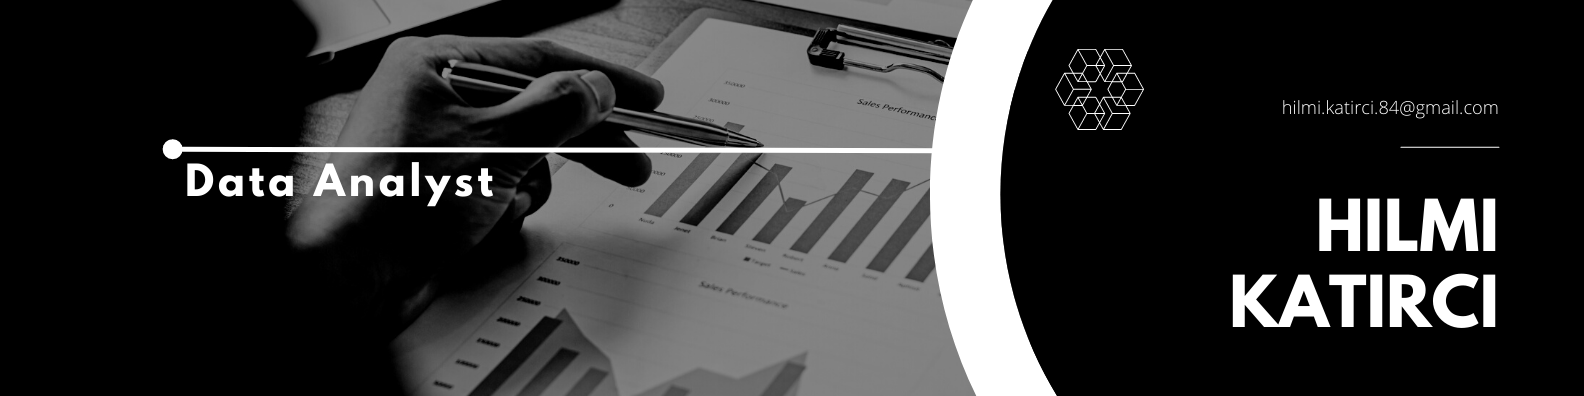